In [1]:
import warnings

warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df=pd.read_csv('car_price.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# EDA

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values

In [9]:
df=df.drop('car_ID',axis=1)

In [10]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Checking missing values

In [11]:
df_null = df.isna().mean().round(2) * 100

In [12]:
df_null.sort_values(ascending=False).head(10)

symboling           0.0
enginetype          0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
dtype: float64

Outliers analysis

Text(0.5, 0, 'Continuous Variable')

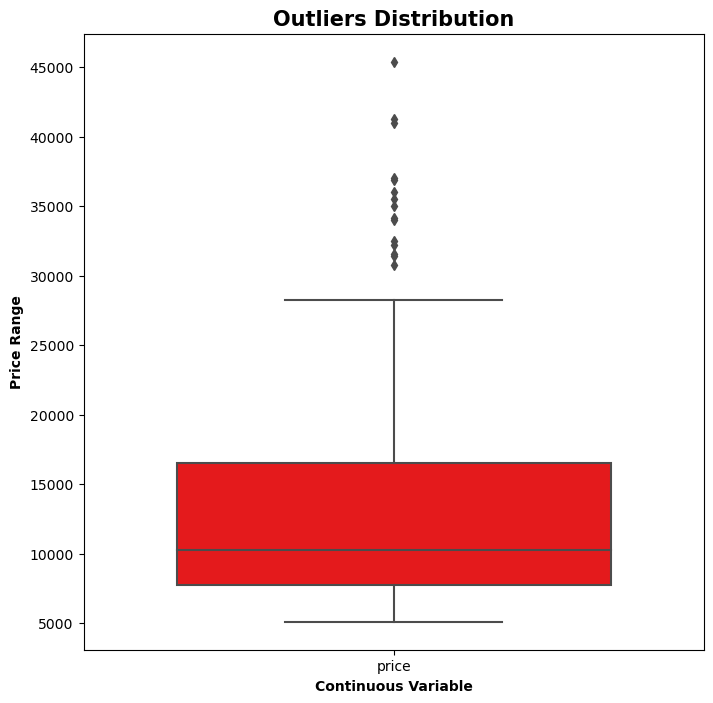

In [13]:
outliers=['price']
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=df[outliers],orient="v",palette='Set1',whis=1.5,saturation=1,width=0.7)
plt.title('Outliers Distribution',fontsize=15,fontweight='bold')
plt.ylabel("Price Range",fontweight='bold')
plt.xlabel("Continuous Variable",fontweight='bold')

Price above 36000 can be considered outliers

In [14]:
df_auto=df.copy()

In [15]:
df_CarName=df_auto['CarName'].str.split(' ',expand=True)

In [16]:
df['CarName']=df_CarName[0]

In [17]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are name error in CarName so they are changed to following

maxda=mazda

Nissan=nissan

porsche=porcshce

toyota=toyouta

vokswagen=volkswagen=vw

In [18]:
df['CarName']=df['CarName'].replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

In [19]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
df['symboling']=df['symboling'].astype(str)

In [21]:
cat_col=df.select_dtypes(include=['object']).columns
df_cat=df[cat_col]

In [22]:
num_col=df.select_dtypes(exclude=['object']).columns
df_num=df[num_col]

In [23]:
cat_col,num_col

(Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
        'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'cylindernumber', 'fuelsystem'],
       dtype='object'),
 Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'price'],
       dtype='object'))

In [24]:
df_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [25]:
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Visualization 

Text(0, 0.5, 'Count of Cars')

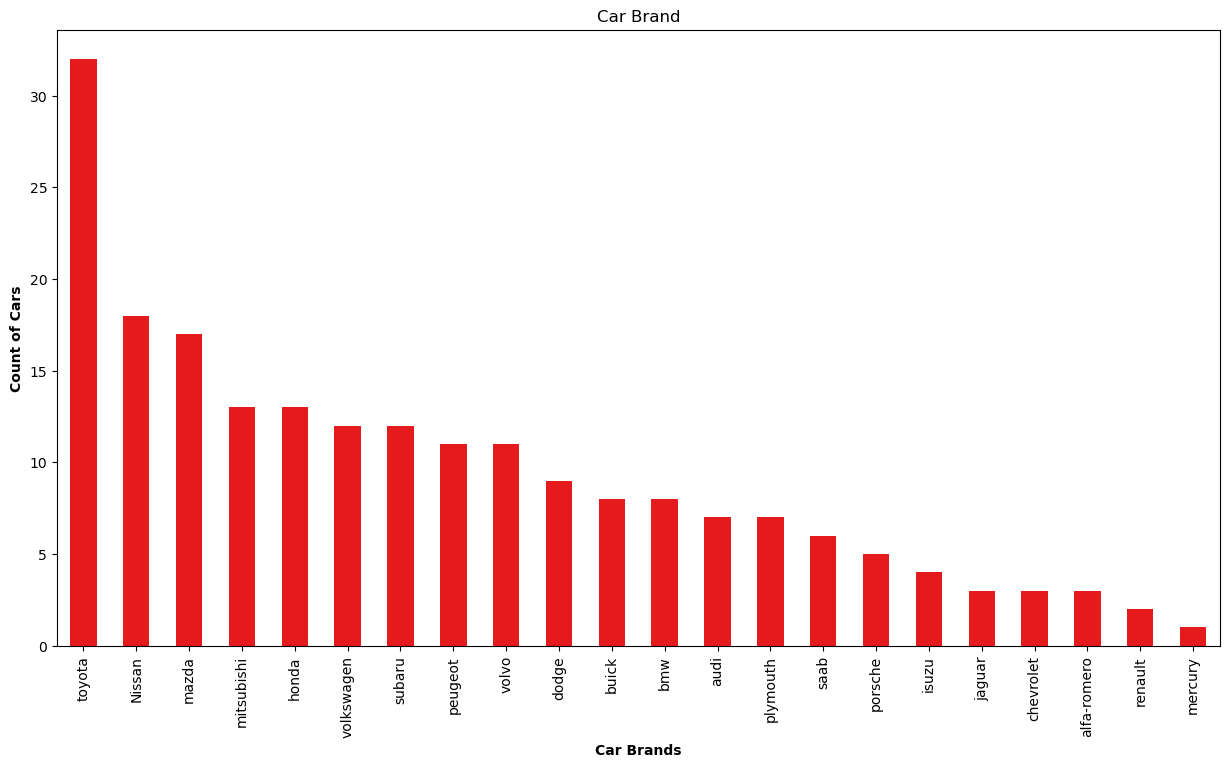

In [27]:
plt.rcParams['figure.figsize']=[15,8]
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True,colormap='Set1')
ax.title.set_text('Car Brand')
plt.xlabel('Car Brands',fontweight='bold')
plt.ylabel('Count of Cars',fontweight='bold')

Different types of car in CarName---

Toyota has most and Mercury has least

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

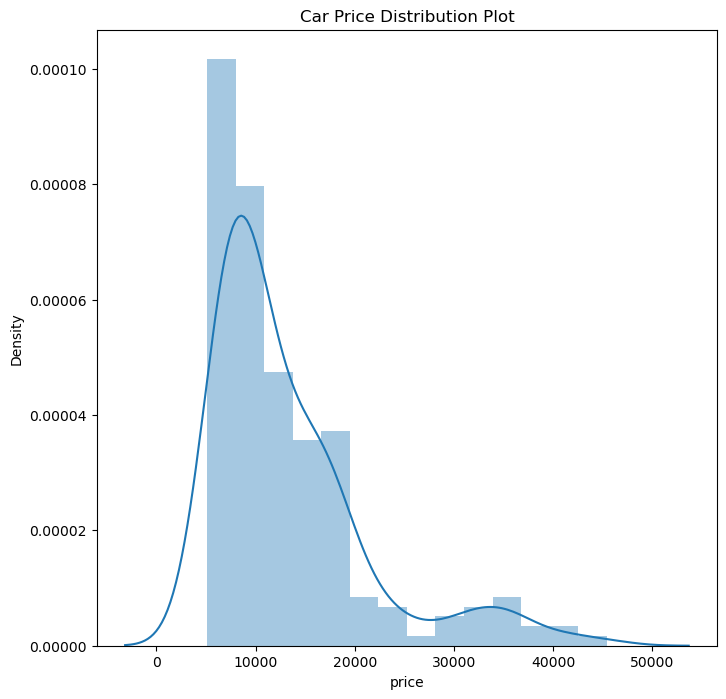

In [28]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

The data plost is skewed

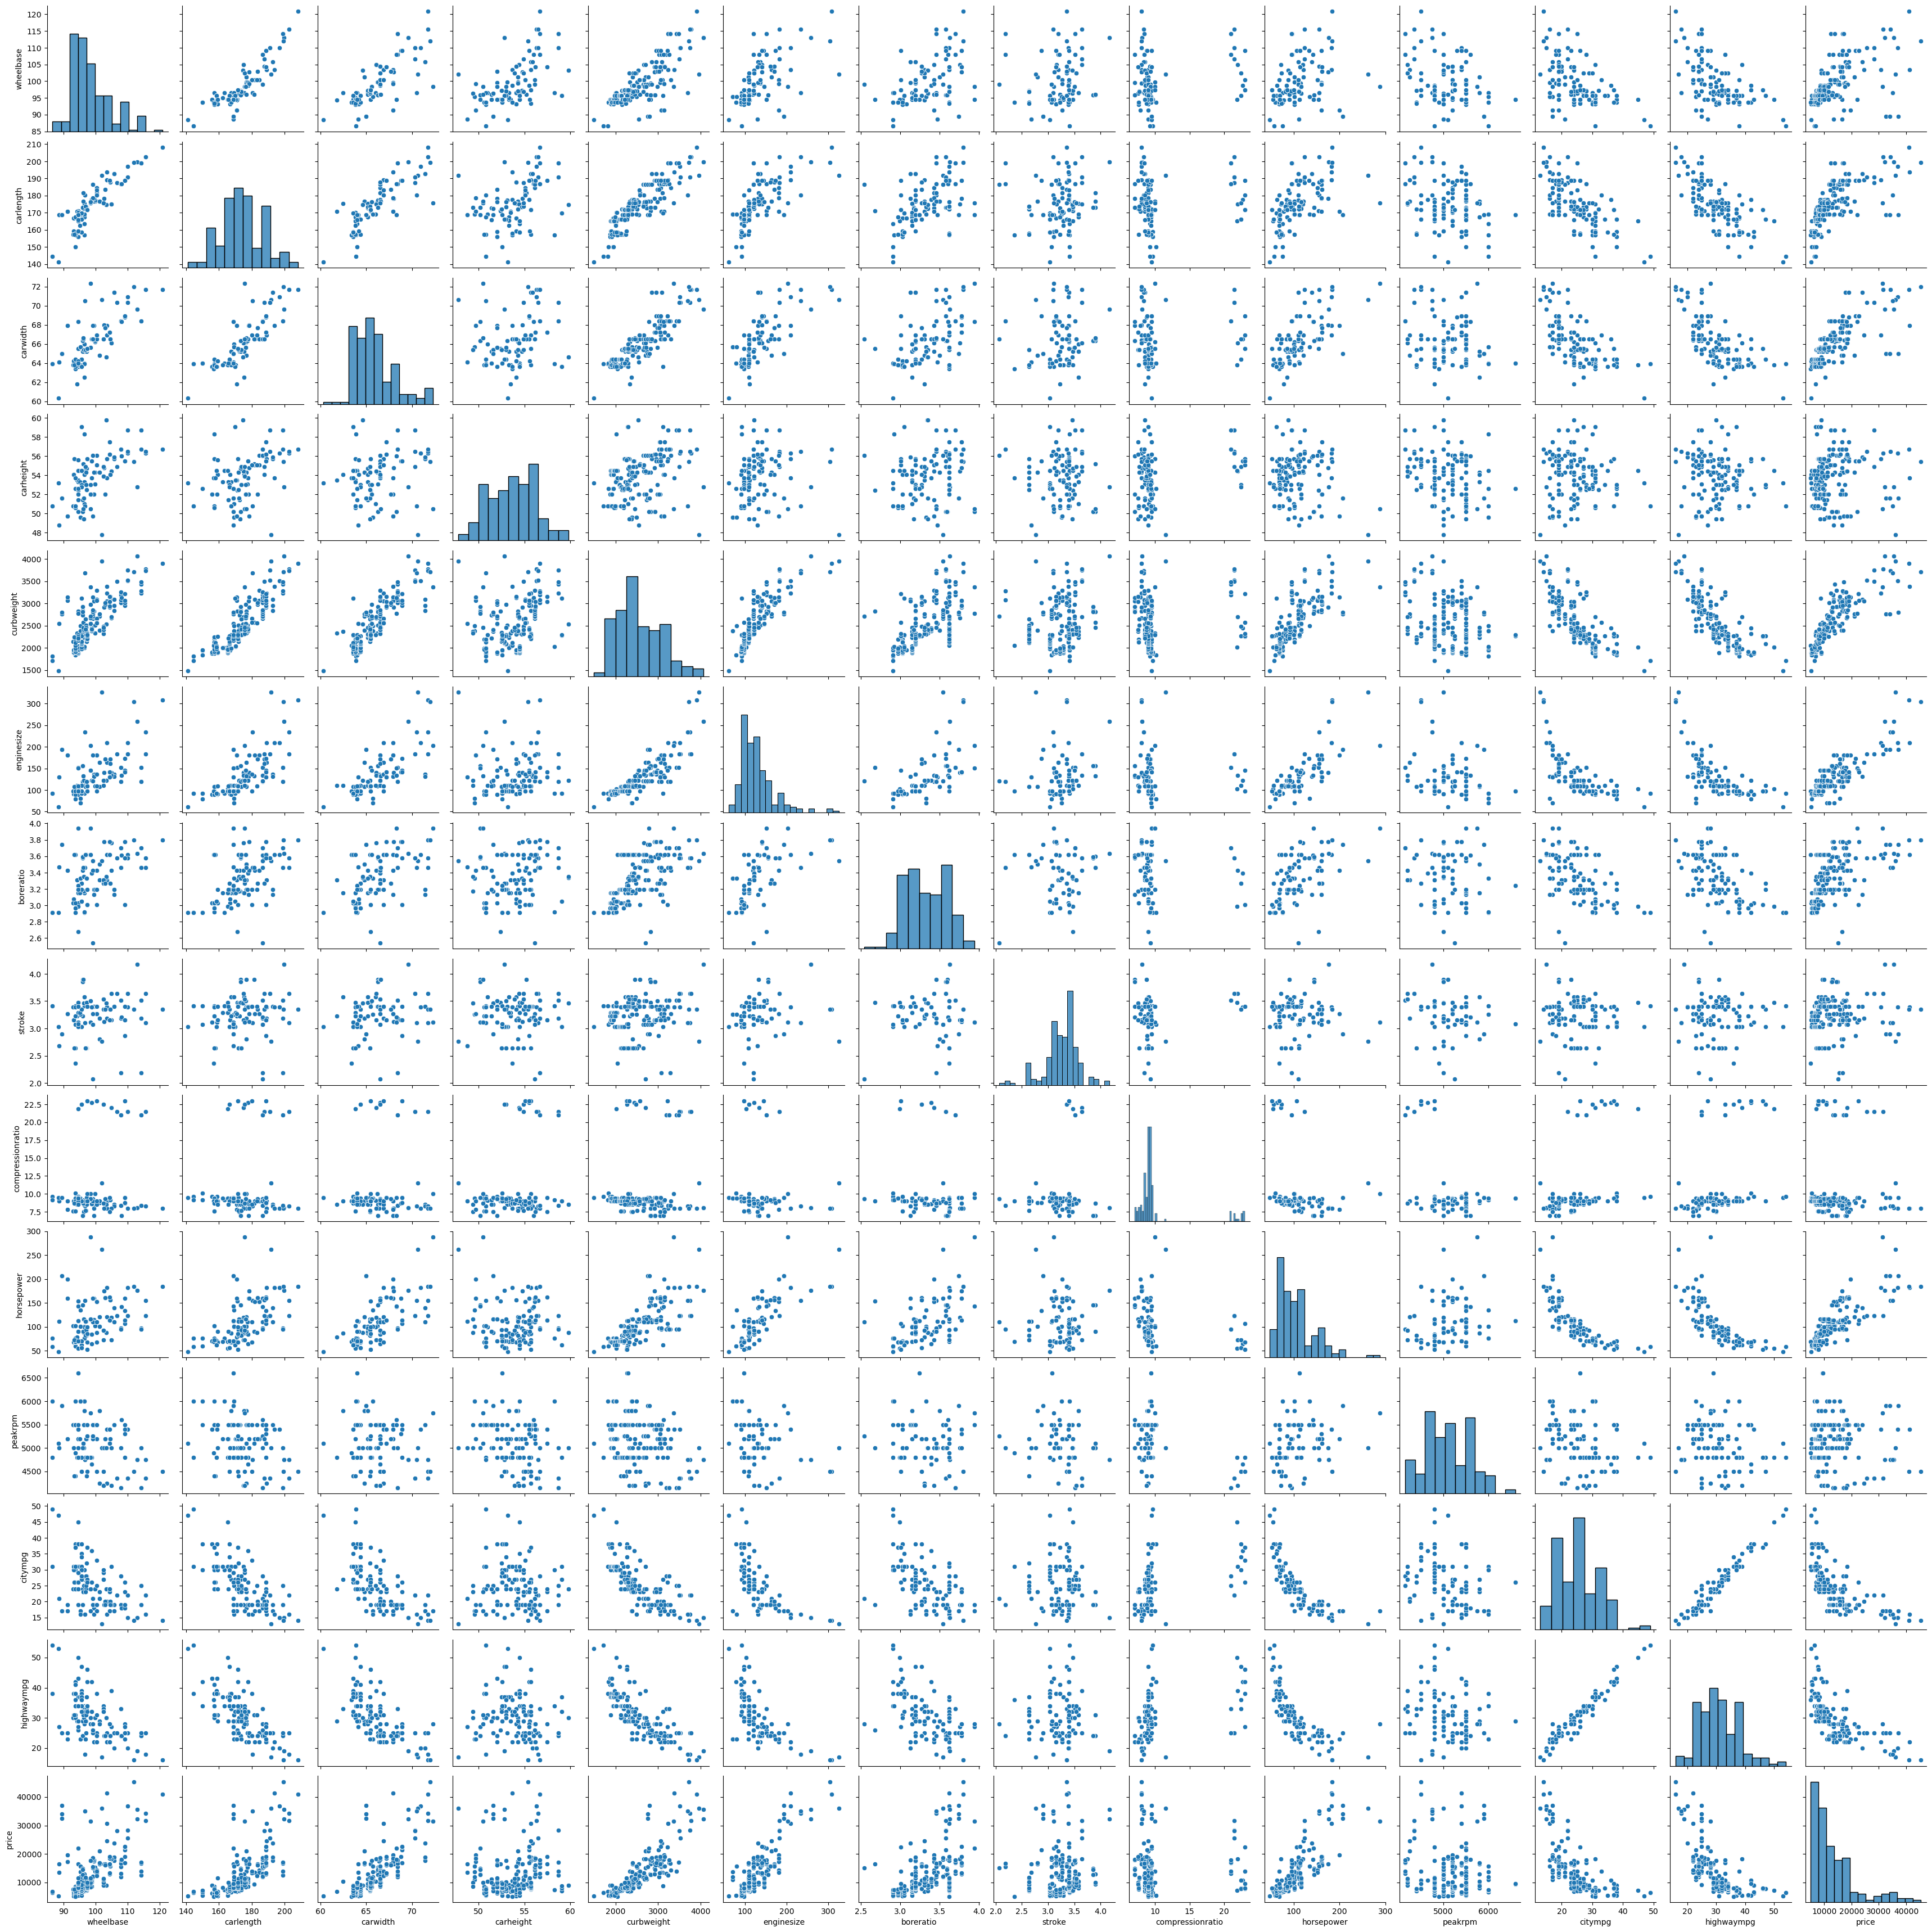

In [29]:
plt.rcParams['figure.figsize']=[15,15]
ax=sns.pairplot(df_num)

carheight doesn't have correlation with price.

Positive correlation with price --- carwidth , carlength, curbweight ,enginesize ,horsepowerseems. 

Negative correlation with price --- citympg , highwaympg.

In [30]:
ca=['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
        'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'cylindernumber', 'fuelsystem']

<Axes: xlabel='fueltype', ylabel='price'>

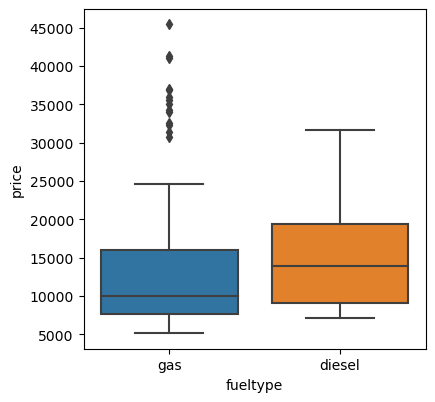

In [31]:
plt.subplot(3,3,1)
sns.boxplot(x='fueltype',y='price',data=df)

<Axes: xlabel='aspiration', ylabel='price'>

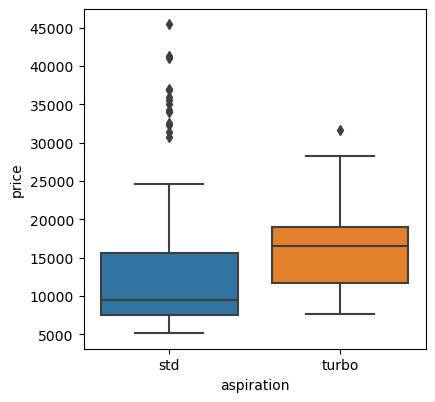

In [32]:
plt.subplot(3,3,2)
sns.boxplot(x='aspiration',y='price',data=df)

<Axes: xlabel='doornumber', ylabel='price'>

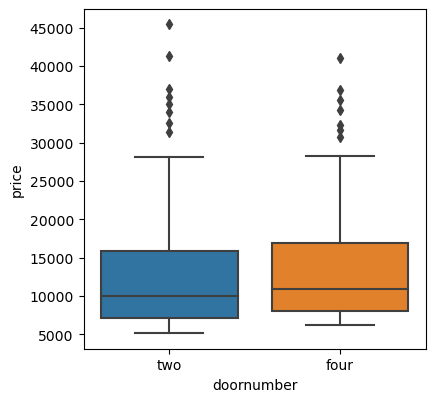

In [33]:
plt.subplot(3,3,3)
sns.boxplot(x='doornumber',y='price',data=df)

<Axes: xlabel='carbody', ylabel='price'>

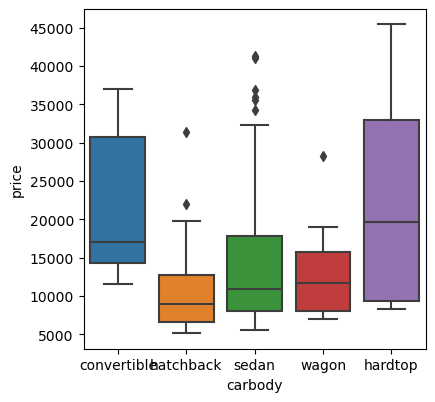

In [34]:
plt.subplot(3,3,4)
sns.boxplot(x='carbody',y='price',data=df)

<Axes: xlabel='enginelocation', ylabel='price'>

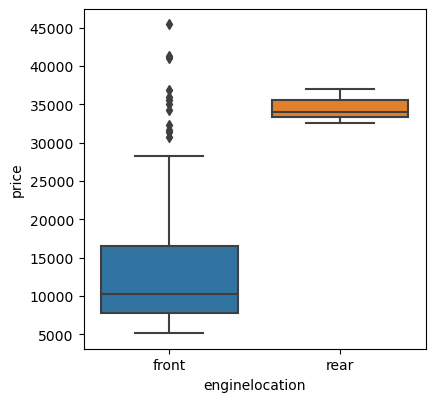

In [35]:
plt.subplot(3,3,5)
sns.boxplot(x='enginelocation',y='price',data=df)

<Axes: xlabel='drivewheel', ylabel='price'>

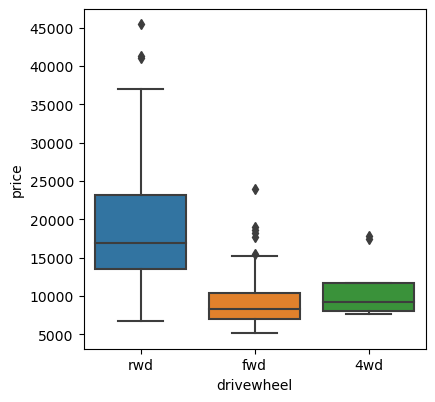

In [36]:
plt.subplot(3,3,6)
sns.boxplot(x='drivewheel',y='price',data=df)

<Axes: xlabel='enginetype', ylabel='price'>

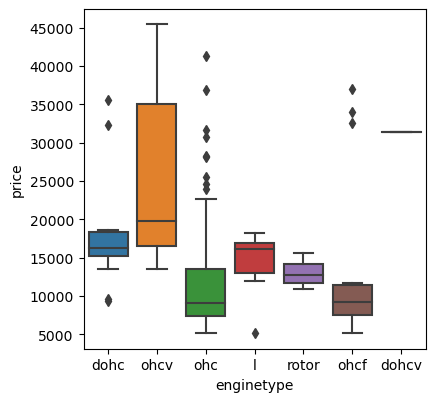

In [37]:
plt.subplot(3,3,7)
sns.boxplot(x='enginetype',y='price',data=df)

<Axes: xlabel='cylindernumber', ylabel='price'>

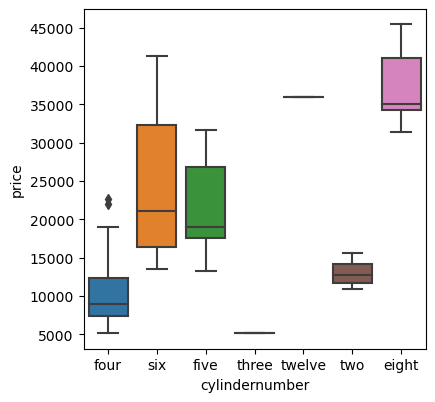

In [38]:
plt.subplot(3,3,8)
sns.boxplot(x='cylindernumber',y='price',data=df)

<Axes: xlabel='fuelsystem', ylabel='price'>

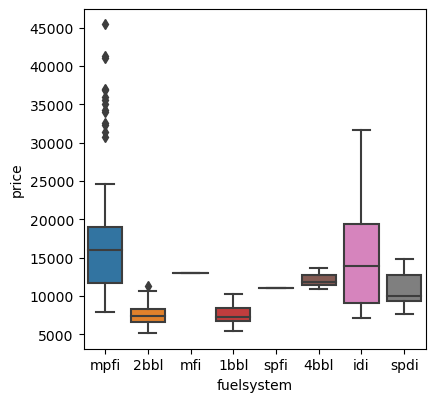

In [39]:
plt.subplot(3,3,9)
sns.boxplot(x='fuelsystem',y='price',data=df)

From above  9 boxplot we can see that----

The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.

All the types of carbody is relatively cheaper as compared to convertible carbody.

The cars with rear enginelocation are way expensive than cars with front enginelocation.

The price of car is directly proportional to no. of cylinders in most cases.

Enginetype ohcv comes into higher price range cars.

DoorNumber isn't affecting the price much.

HigherEnd cars seems to have rwd drivewheel.

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

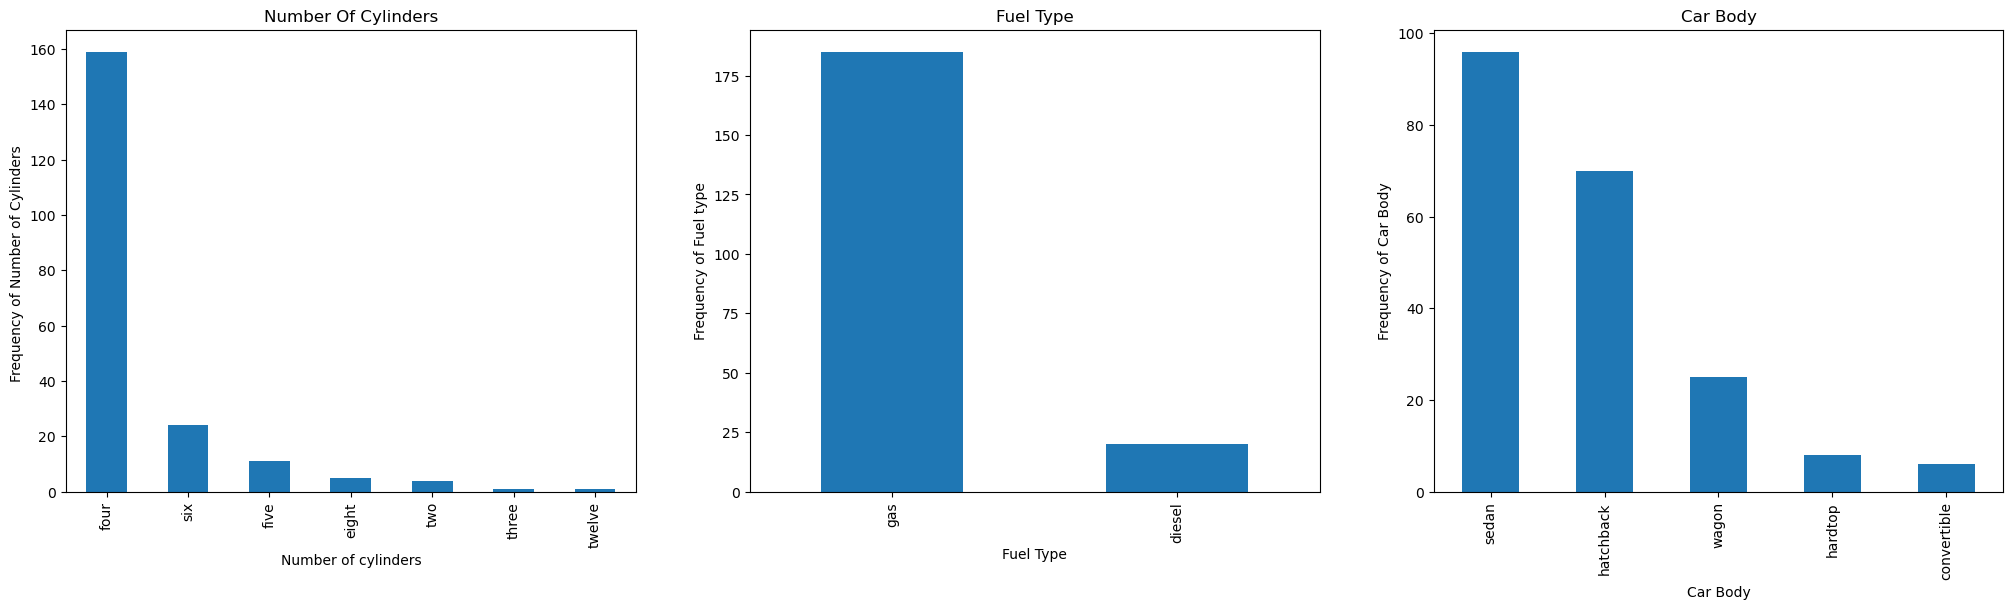

In [40]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number Of Cylinders')
plt1.set(xlabel='Number of cylinders',ylabel='Frequency of Number of Cylinders ')

plt.subplot(1,3,2)
pt2=df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
pt2.set(xlabel='Fuel Type',ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
pt3=df['carbody'].value_counts().plot(kind='bar')
plt.title('Car Body')
pt3.set(xlabel='Car Body',ylabel='Frequency of Car Body')

The number of cylinders used in most cars is four.

Number of Gas fueled cars are way more than diesel fueled cars.

Sedan is the most prefered car type.

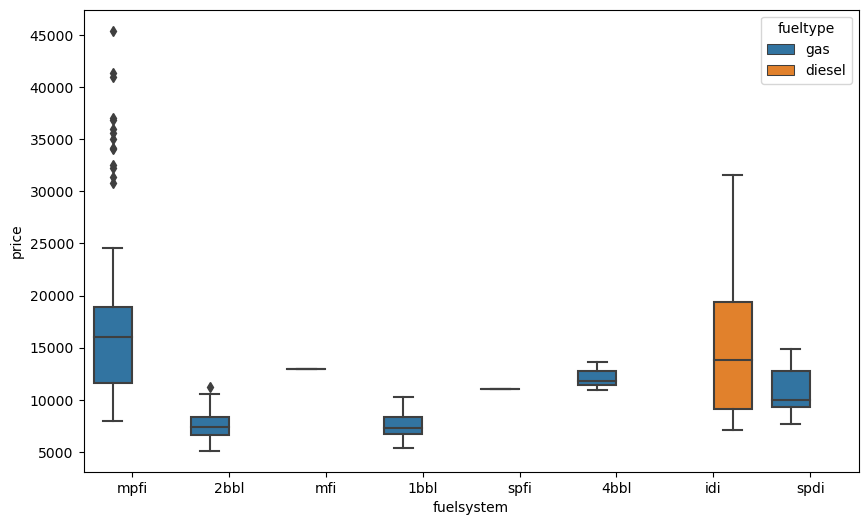

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuelsystem',y='price',hue='fueltype',data=df)
plt.show()

Above is relationship between fuelsystem vs price with hue fueltype

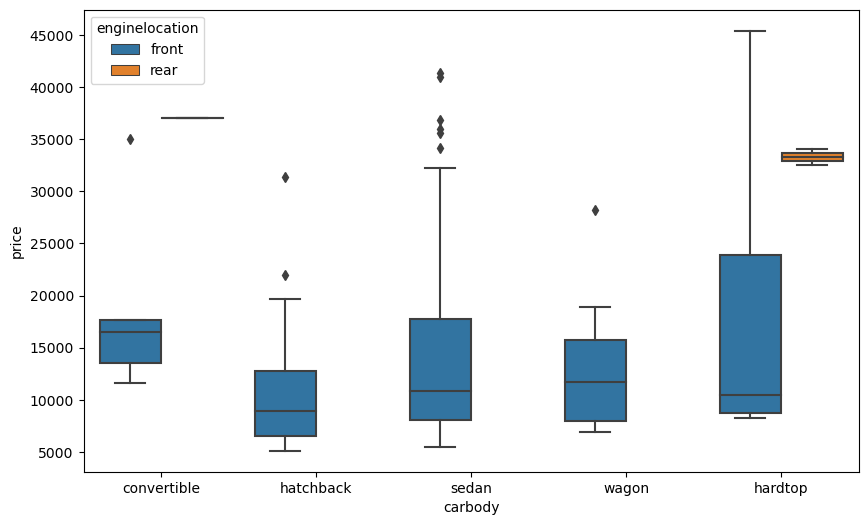

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='carbody',y='price',hue='enginelocation',data=df)
plt.show()

Above relationship between carbody vs Price with hue enginelocation

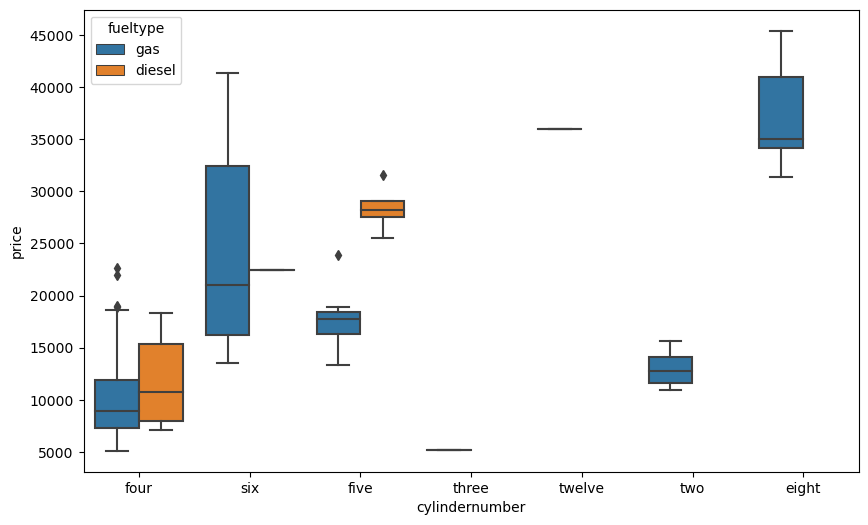

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cylindernumber',y='price',hue='fueltype',data=df)
plt.show()

Above relationship between cylindernumber vs price with hue fueltype

<Figure size 2000x600 with 0 Axes>

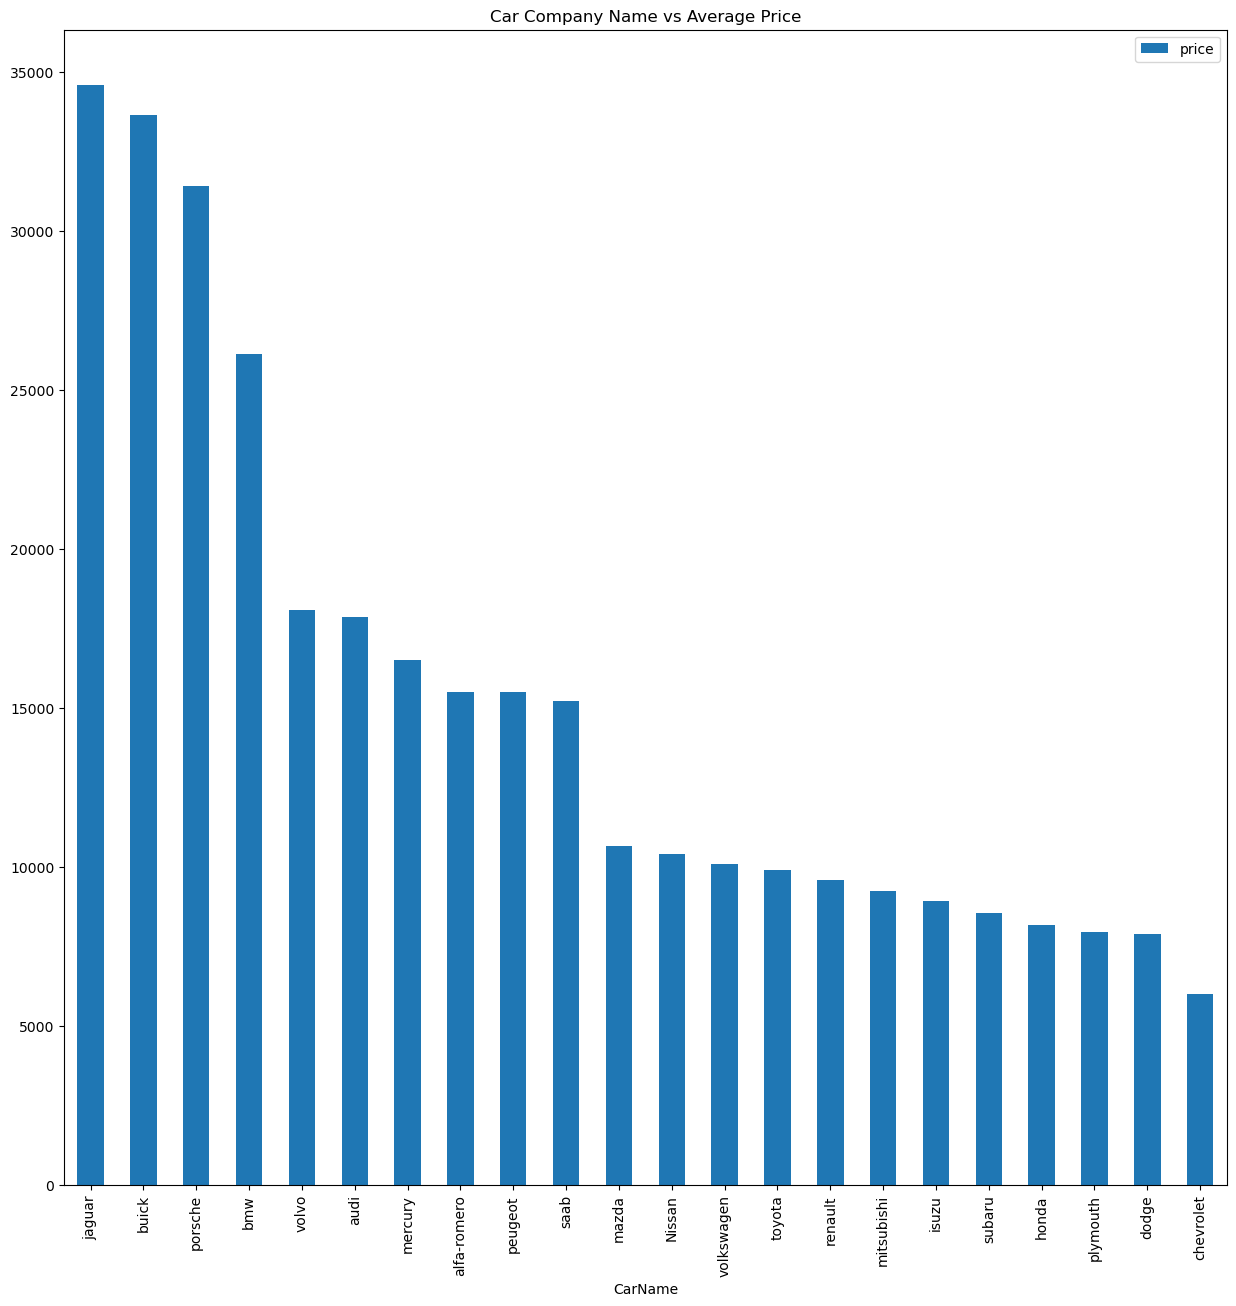

In [44]:
plt.figure(figsize=(20,6))

df_auto1=pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending=False))
df_auto1.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In CarName vs Average Price hardtop and convertible seems to have the highest average price

Binning Car Companies based on avg prices of each Car Company

In [45]:
df['price']=df['price'].astype('int')
df_temp=df.copy()
temp=df.groupby(['CarName'])['price'].mean()
df_temp=df_temp.merge(temp.reset_index(),how='left',on='CarName')
bins=[0,10000,20000,40000]
label=['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category']=pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


Significant variables after Visualization

Cars_Category , Engine Type, Fuel Type

Car Body , Aspiration , Cylinder Number

Drivewheel , Curbweight , Car Length

Car Length , Car width , Engine Size

Boreratio , Horse Power , Wheel base

citympg , highwaympg , symboling

In [46]:
sig_col=['price','Cars_Category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel','wheelbase','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','carlength','carwidth']

In [47]:
df_car=df[sig_col]

# Categorical Variables

In [48]:
sig_cat_col=['Cars_Category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel']

In [49]:
dummy_variable=pd.get_dummies(df_car[sig_cat_col])
dummy_variable.shape

(205, 29)

In [50]:
dummy=pd.get_dummies(df_car[sig_cat_col],drop_first=True)
dummy.shape

(205, 22)

In [51]:
df_car=pd.concat([df_car,dummy],axis=1)
df_car.shape

(205, 39)

In [52]:
df_car.drop(sig_cat_col,axis=1,inplace=True)
df_car.shape

(205, 32)

# Split in train and test data set

In [53]:
df_car.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,0,0,0,0,1,0,0,0,0,1
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,1,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,1,0,1,0,0,0,0,0,0,0


In [54]:
np.random.seed(42)
df_train,df_test=train_test_split(df_car,train_size=0.75,test_size=0.25,random_state=42)

In [55]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
90,7099,94.5,2017,103,2.99,55,45,50,165.3,63.8,...,1,0,0,1,0,0,0,0,1,0
173,8948,102.4,2326,122,3.31,92,29,34,175.6,66.5,...,1,0,0,1,0,0,0,0,1,0
93,7349,94.5,2024,97,3.15,69,31,37,170.2,63.8,...,0,1,0,1,0,0,0,0,1,0
5,15250,99.8,2507,136,3.19,110,19,25,177.3,66.3,...,1,0,1,0,0,0,0,0,1,0
167,8449,98.4,2540,146,3.62,116,24,30,176.2,65.6,...,0,0,0,1,0,0,0,0,0,1


# Scaling

In [56]:
scaler=preprocessing.StandardScaler()
scaler_mms=preprocessing.MinMaxScaler()

In [57]:
sig_num_col=['boreratio','horsepower','citympg','highwaympg','wheelbase','carlength','carwidth','curbweight','enginesize','price']

In [58]:
df_train_ss=df_train.copy()
df_train_mm=df_train.copy()

In [59]:
df_train_ss[sig_num_col]=scaler.fit_transform(df_train[sig_num_col])

In [60]:
df_train_ss.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
90,-0.795646,-0.704615,-1.062582,-0.581434,-1.226479,-1.253292,3.271472,3.069127,-0.750156,-1.011226,...,1,0,0,1,0,0,0,0,1,0
173,-0.560951,0.616005,-0.459802,-0.118738,-0.042559,-0.339003,0.666214,0.563884,0.101982,0.256951,...,1,0,0,1,0,0,0,0,1,0
93,-0.763913,-0.704615,-1.048927,-0.727548,-0.634519,-0.907345,0.991871,1.033617,-0.344770,-1.011226,...,0,1,0,1,0,0,0,0,1,0
5,0.238967,0.181371,-0.106717,0.222196,-0.486529,0.105787,-0.962072,-0.845315,0.242626,0.163012,...,1,0,1,0,0,0,0,0,1,0
167,-0.624289,-0.052663,-0.042343,0.465720,1.104363,0.254050,-0.147929,-0.062426,0.151621,-0.165775,...,0,0,0,1,0,0,0,0,0,1


In [61]:
df_train_mm[sig_num_col]=scaler_mms.fit_transform(df_train[sig_num_col])

In [62]:
df_train_mm.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
90,0.049178,0.272414,0.088117,0.128906,0.321429,0.012712,1.00000,1.000000,0.356897,0.190476,...,1,0,0,1,0,0,0,0,1,0
173,0.095080,0.544828,0.225634,0.203125,0.550000,0.169492,0.50000,0.529412,0.534483,0.447619,...,1,0,0,1,0,0,0,0,1,0
93,0.055385,0.272414,0.091233,0.105469,0.435714,0.072034,0.56250,0.617647,0.441379,0.190476,...,0,1,0,1,0,0,0,0,1,0
5,0.251527,0.455172,0.306186,0.257812,0.464286,0.245763,0.18750,0.264706,0.563793,0.428571,...,1,0,1,0,0,0,0,0,1,0
167,0.082692,0.406897,0.320872,0.296875,0.771429,0.271186,0.34375,0.411765,0.544828,0.361905,...,0,0,0,1,0,0,0,0,0,1


In [63]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
90,7099,94.5,2017,103,2.99,55,45,50,165.3,63.8,...,1,0,0,1,0,0,0,0,1,0
173,8948,102.4,2326,122,3.31,92,29,34,175.6,66.5,...,1,0,0,1,0,0,0,0,1,0
93,7349,94.5,2024,97,3.15,69,31,37,170.2,63.8,...,0,1,0,1,0,0,0,0,1,0
5,15250,99.8,2507,136,3.19,110,19,25,177.3,66.3,...,1,0,1,0,0,0,0,0,1,0
167,8449,98.4,2540,146,3.62,116,24,30,176.2,65.6,...,0,0,0,1,0,0,0,0,0,1


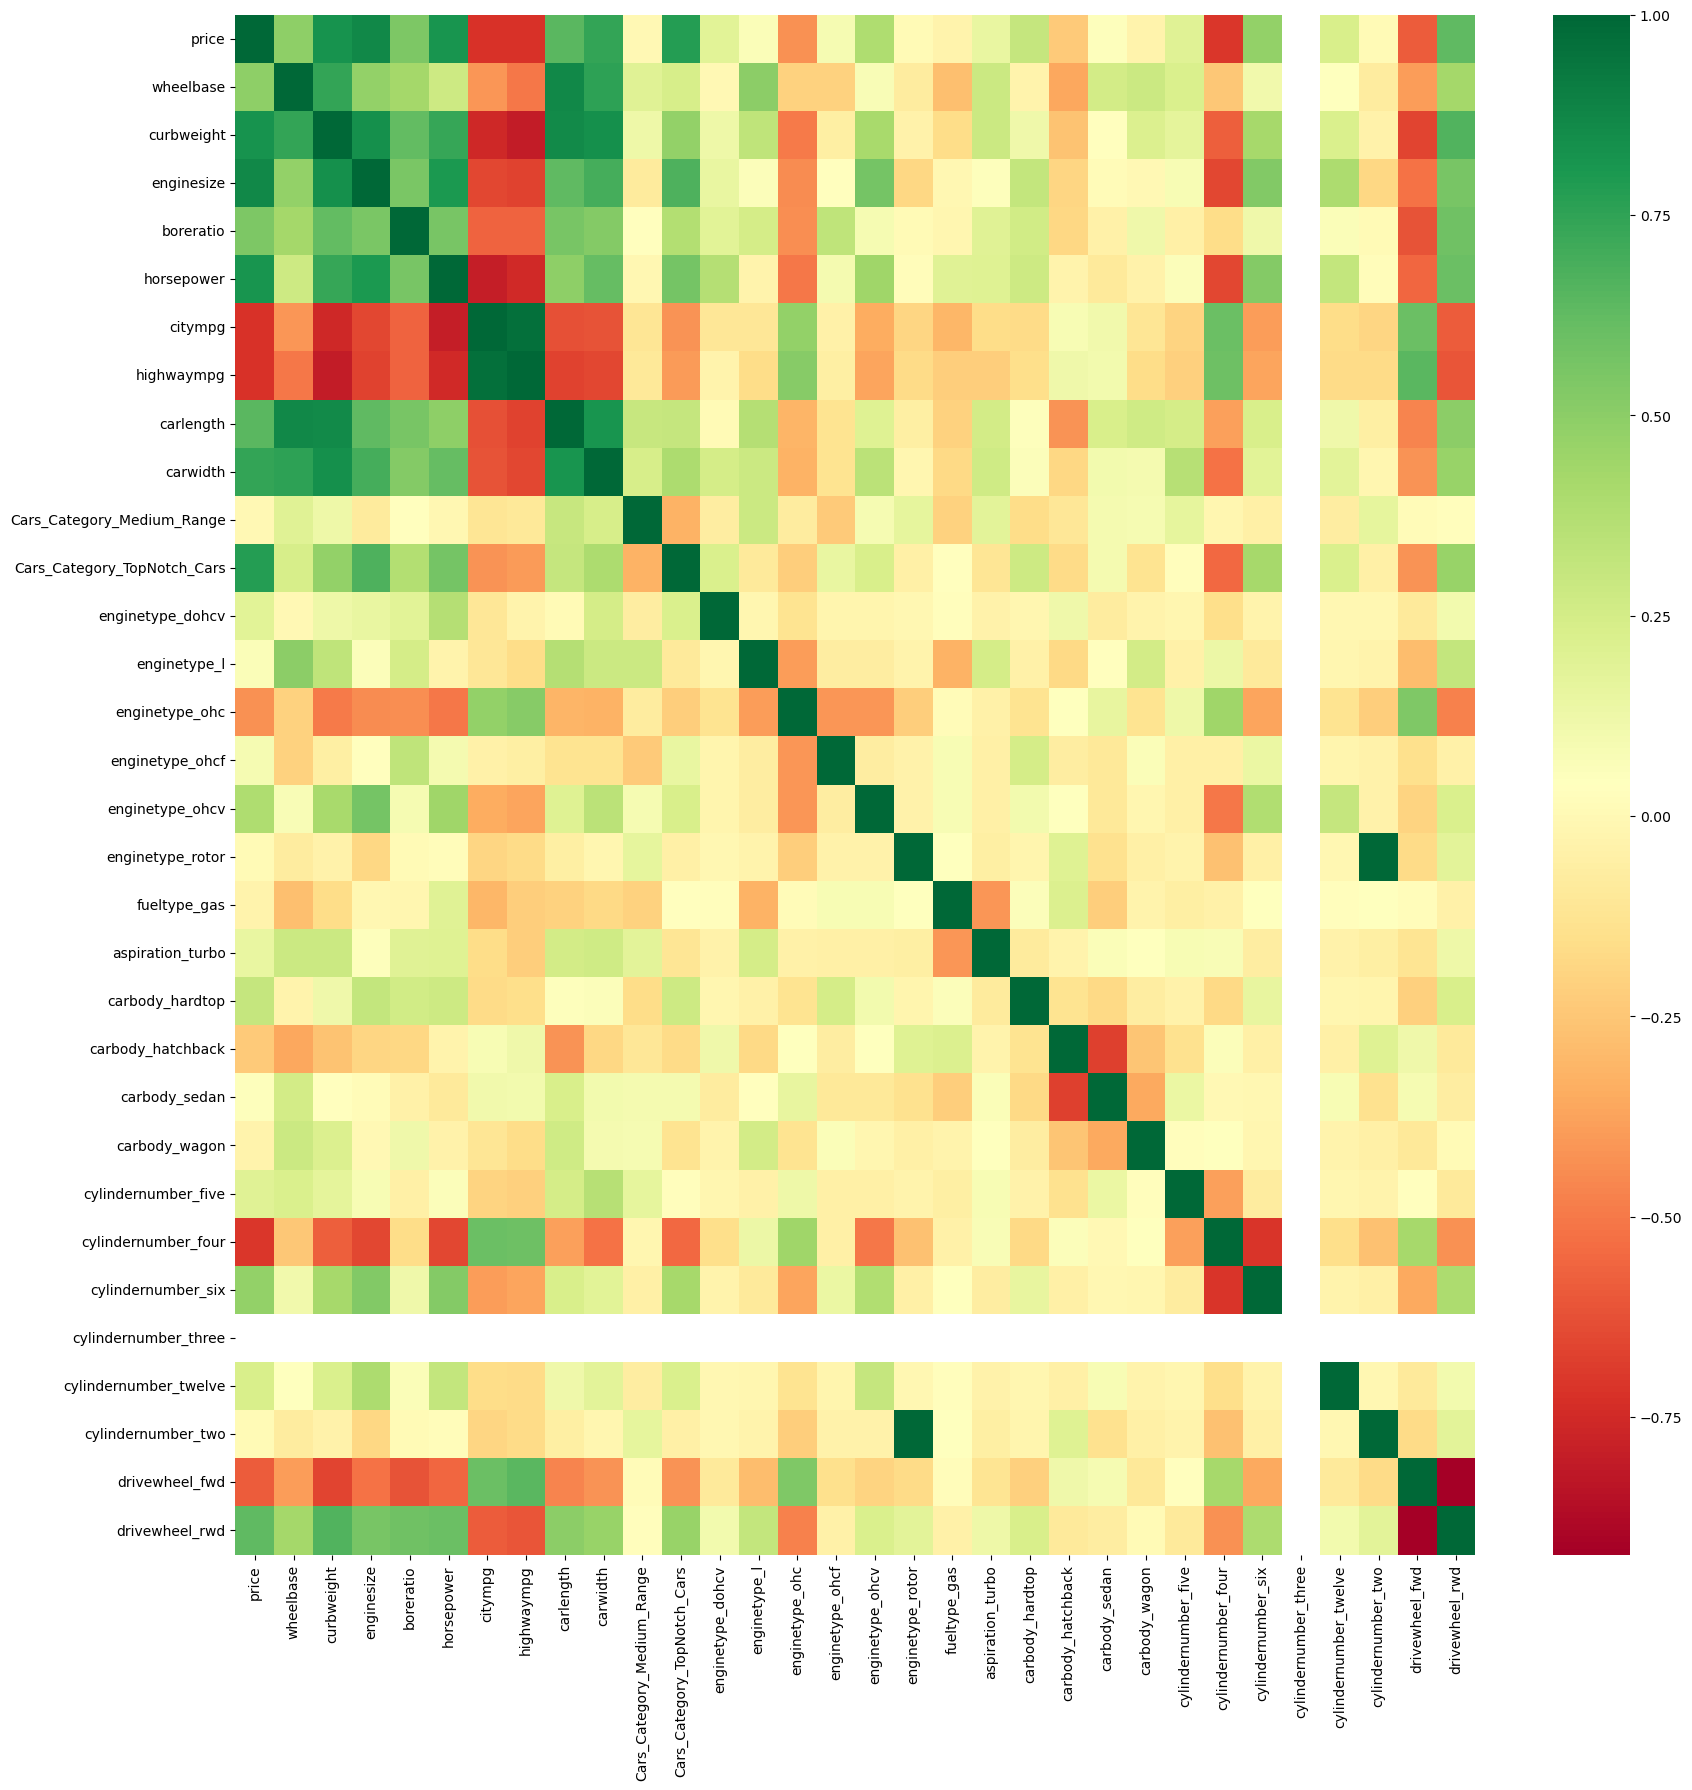

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train_ss.corr(),cmap="RdYlGn")
plt.show()

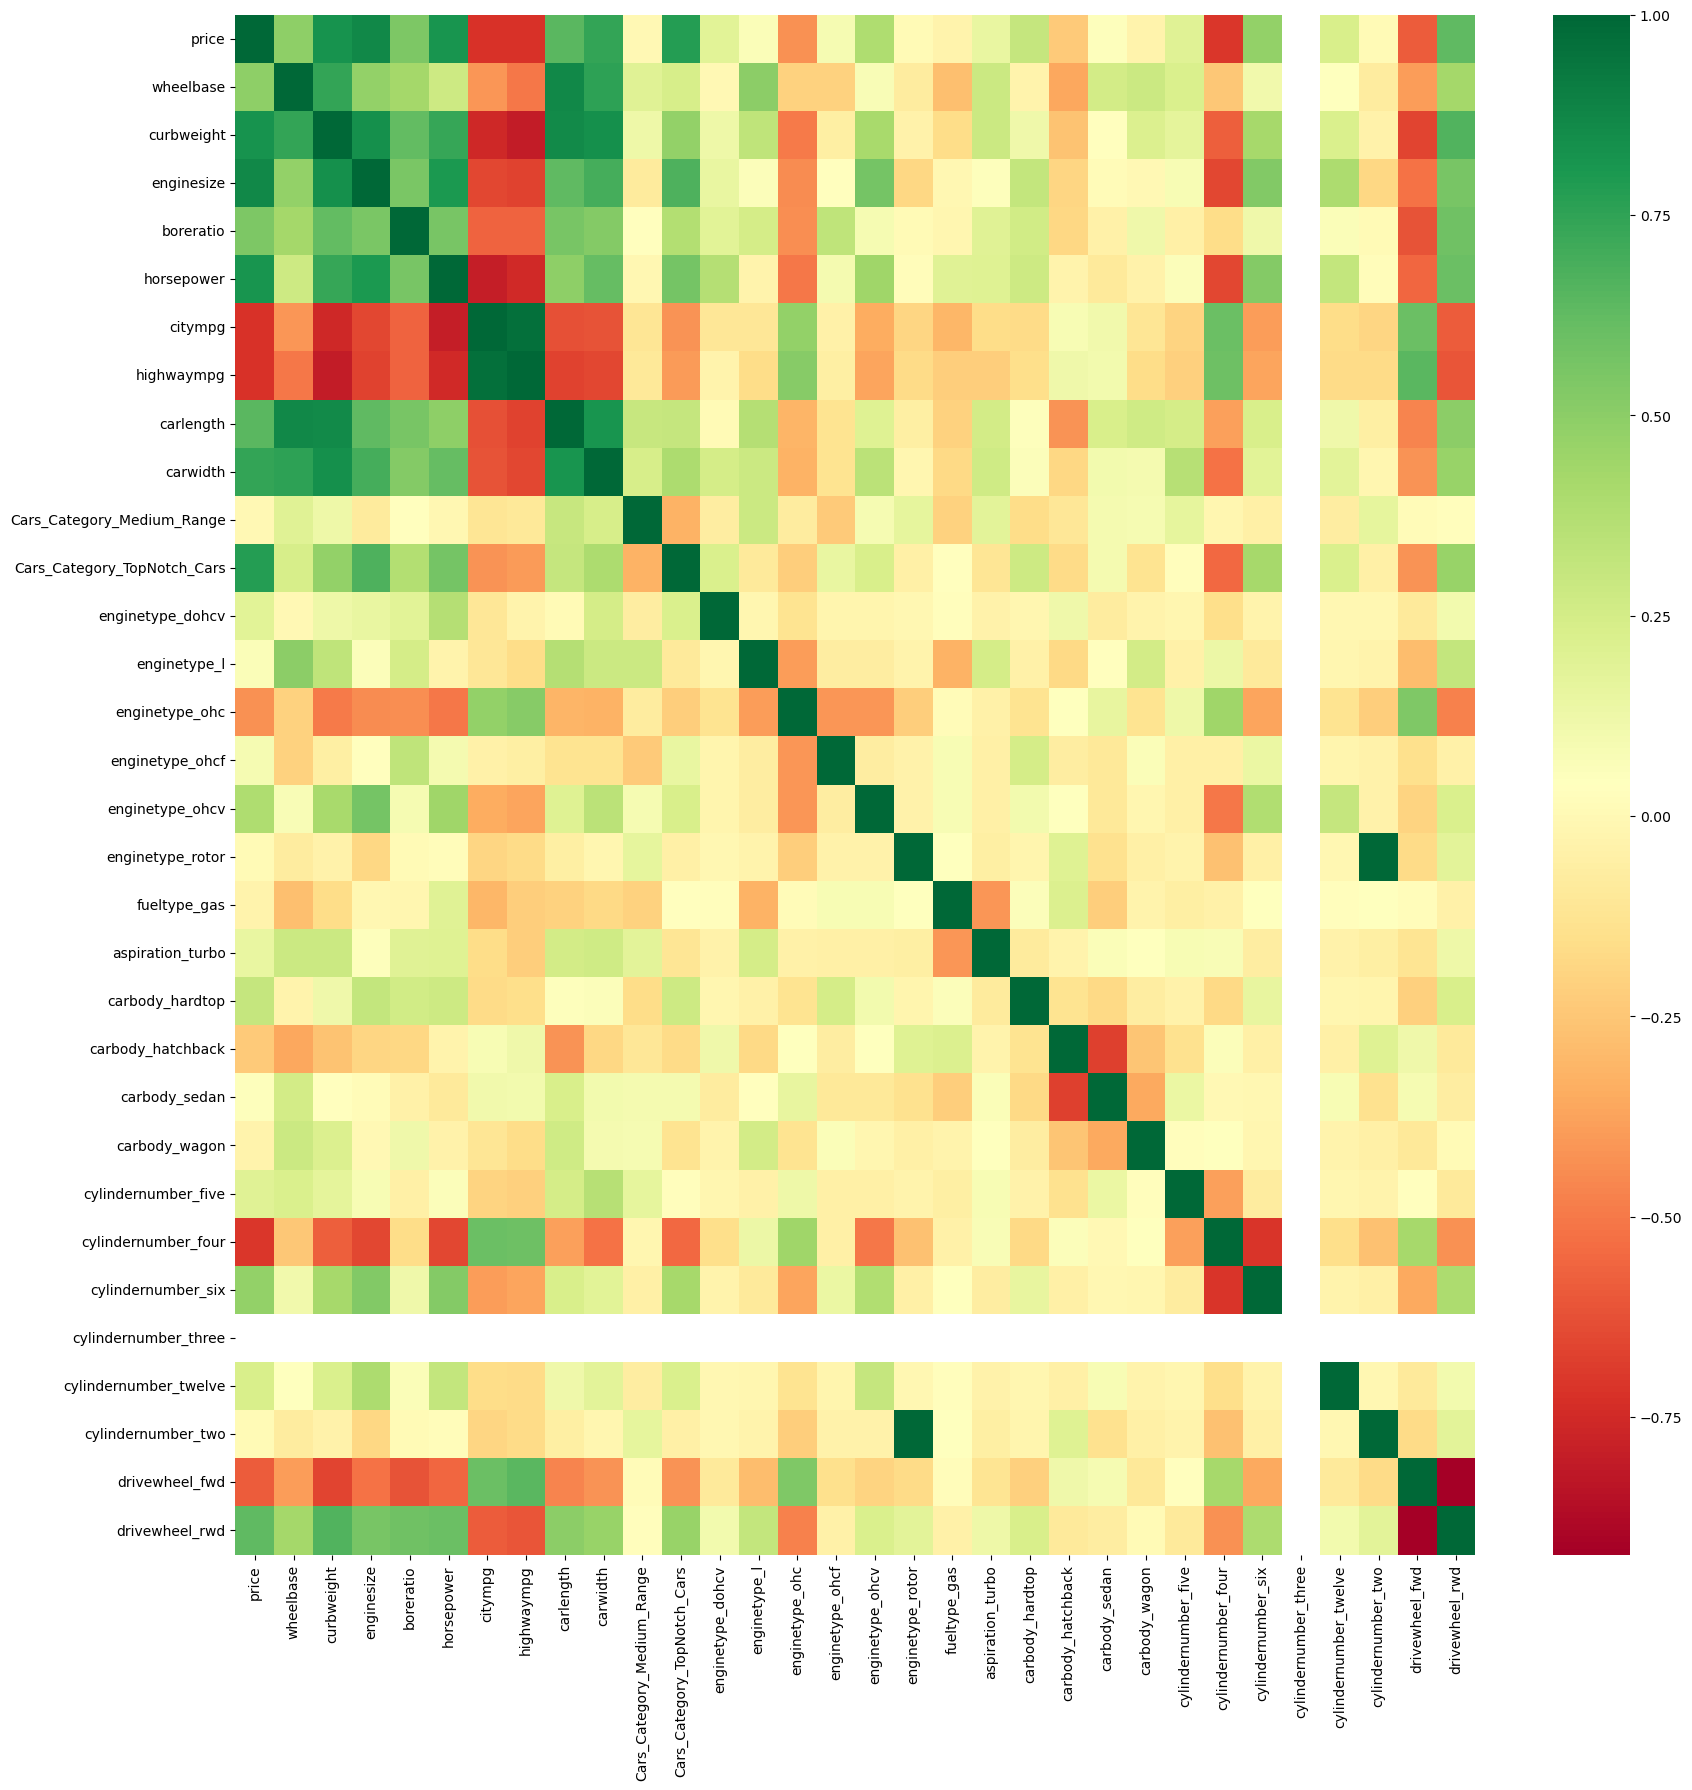

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train_mm.corr(),cmap="RdYlGn")
plt.show()

In [66]:
col=['enginesize','curbweight','carwidth','highwaympg','citympg','horsepower','carlength','wheelbase','boreratio']

In [67]:
df_car[col].head()

,enginesize,curbweight,carwidth,highwaympg,citympg,horsepower,carlength,wheelbase,boreratio
0,130,2548,64.1,27,21,111,168.8,88.6,3.47
1,130,2548,64.1,27,21,111,168.8,88.6,3.47
2,152,2823,65.5,26,19,154,171.2,94.5,2.68
3,109,2337,66.2,30,24,102,176.6,99.8,3.19
4,136,2824,66.4,22,18,115,176.6,99.4,3.19


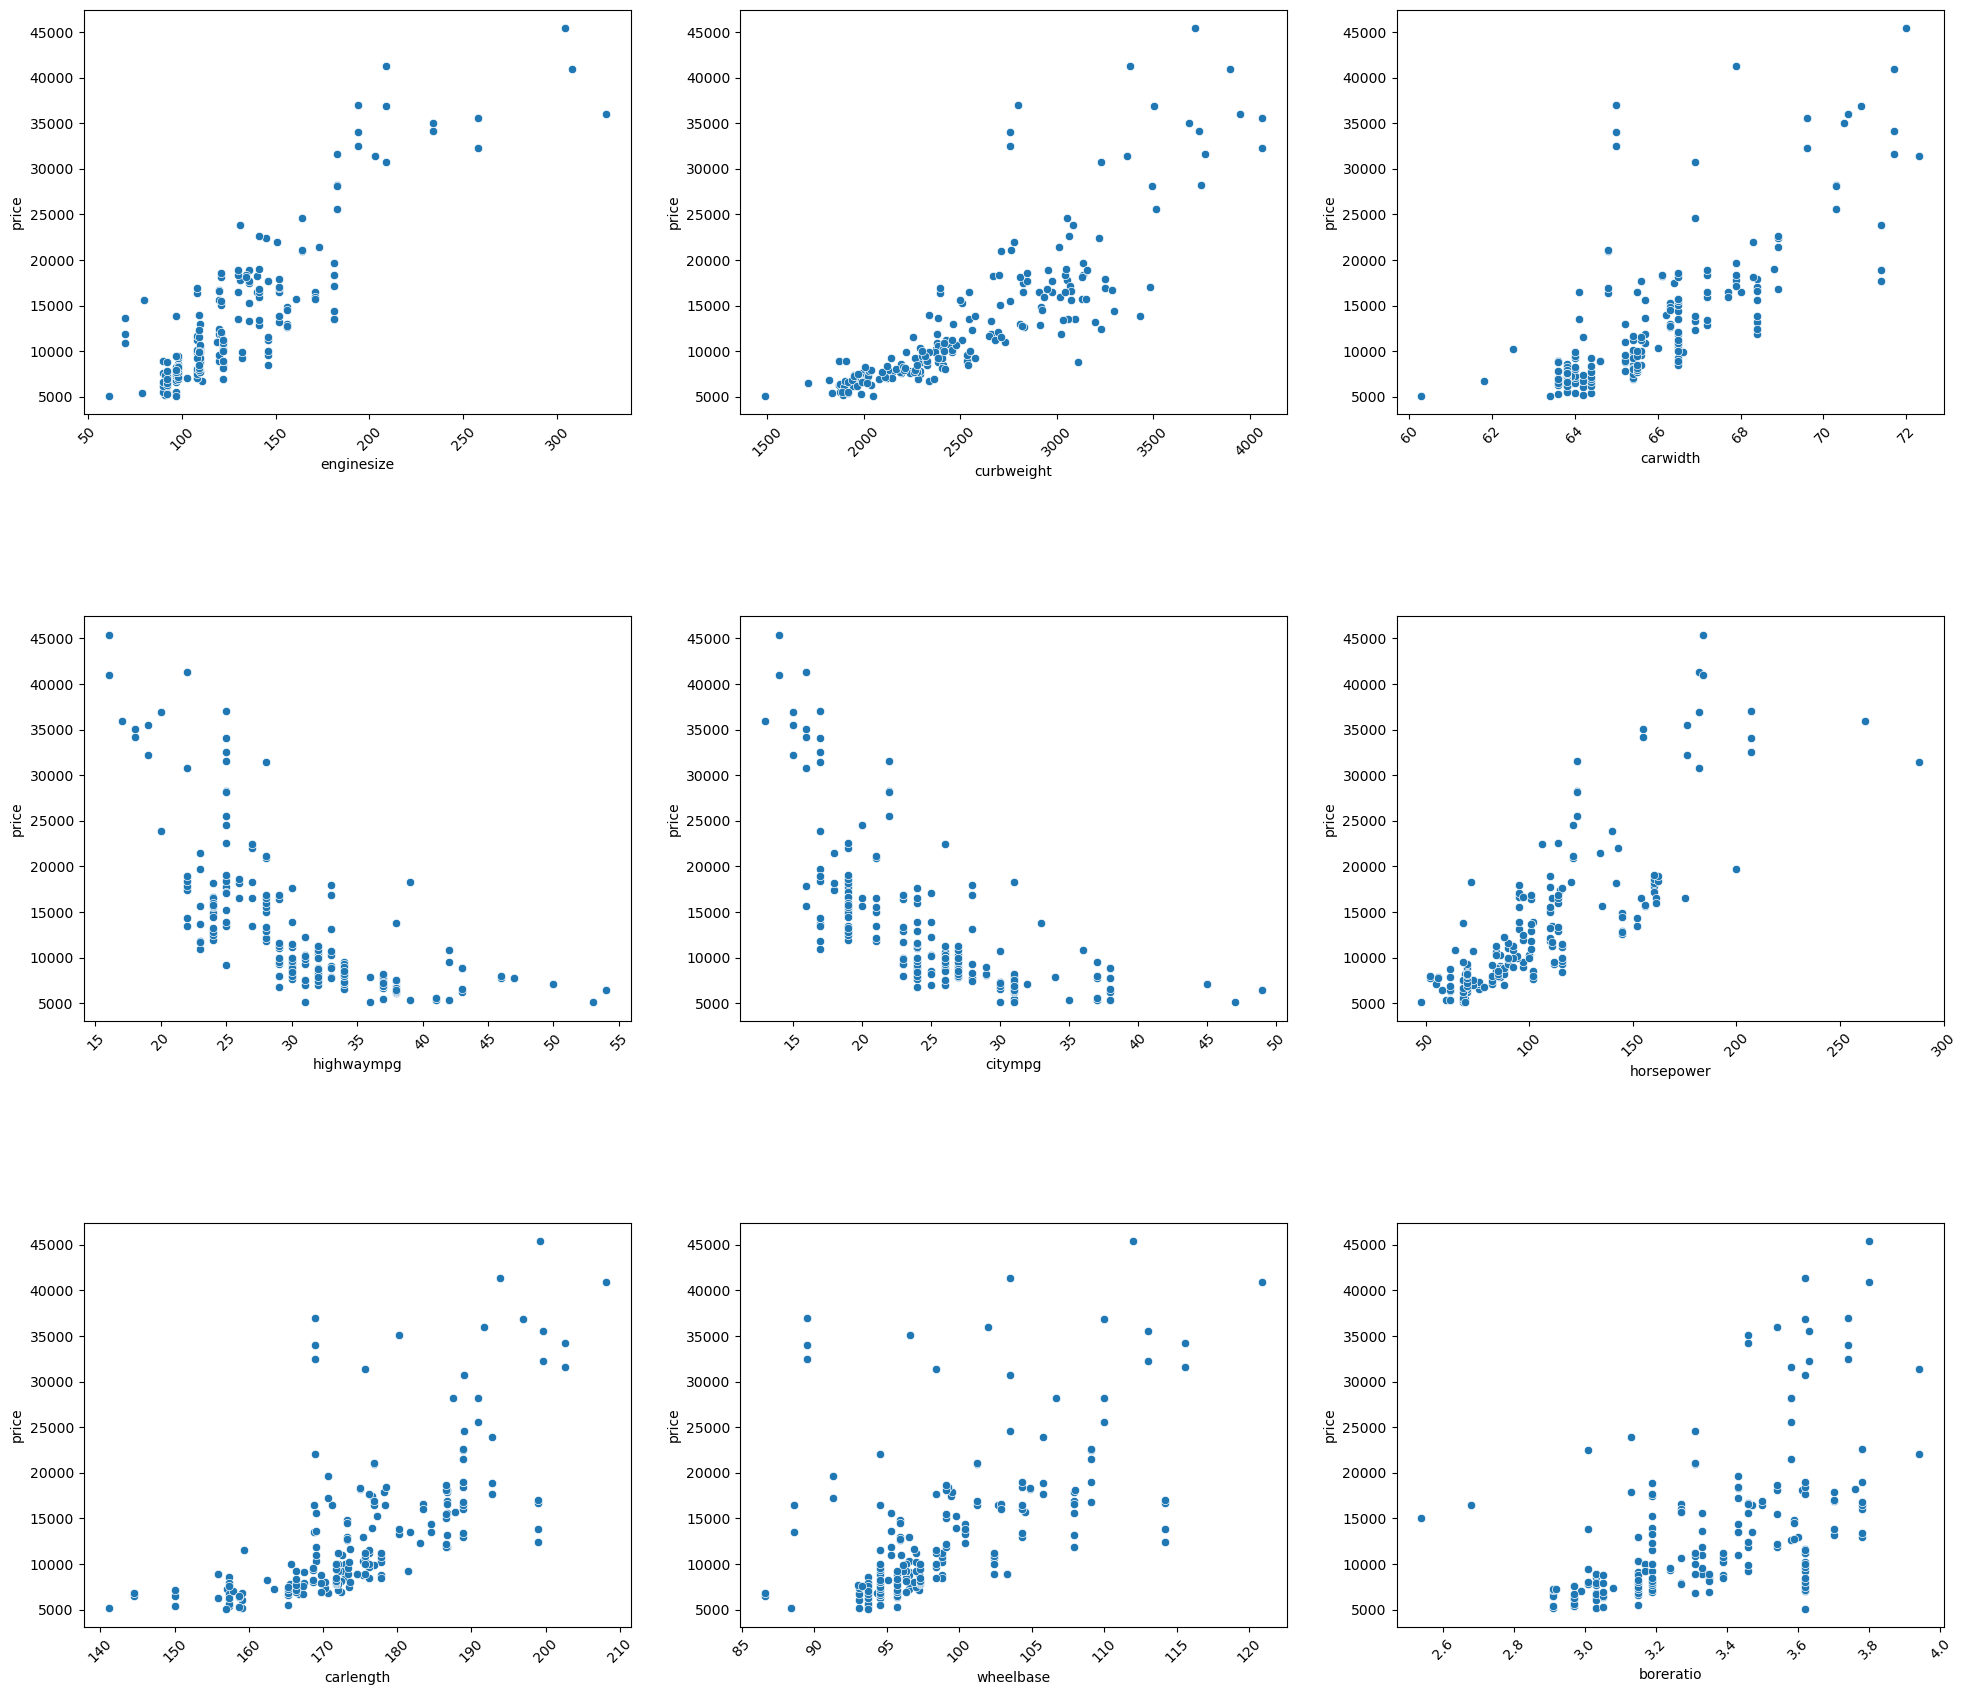

In [68]:
fig,axes = plt.subplots(3,3,figsize=(24,21))
for seg,c in enumerate(col):
    x,y=seg//3,seg%3
    axe=sns.scatterplot(x=c,y='price',data=df_car,ax=axes[x,y])
    plt.setp(axe.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace=0.5)

Independent variables vs Dependent Variables

# Training

In [69]:
y_train1=df_train_ss.pop('price')
X_train1=df_train_ss
y_train2=df_train_mm.pop('price')
X_train2=df_train_mm

In [70]:
X_train1

,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
90,-0.704615,-1.062582,-0.581434,-1.226479,-1.253292,3.271472,3.069127,-0.750156,-1.011226,1,...,1,0,0,1,0,0,0,0,1,0
173,0.616005,-0.459802,-0.118738,-0.042559,-0.339003,0.666214,0.563884,0.101982,0.256951,0,...,1,0,0,1,0,0,0,0,1,0
93,-0.704615,-1.048927,-0.727548,-0.634519,-0.907345,0.991871,1.033617,-0.344770,-1.011226,1,...,0,1,0,1,0,0,0,0,1,0
5,0.181371,-0.106717,0.222196,-0.486529,0.105787,-0.962072,-0.845315,0.242626,0.163012,1,...,1,0,1,0,0,0,0,0,1,0
167,-0.052663,-0.042343,0.465720,1.104363,0.254050,-0.147929,-0.062426,0.151621,-0.165775,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.081071,1.126153,1.318055,0.401411,1.341314,-0.962072,-0.845315,0.341904,0.914524,1,...,0,0,0,0,1,0,0,0,0,1
14,0.799889,0.962291,0.904064,-0.042559,0.377603,-0.799244,-0.845315,1.210588,0.444829,0,...,1,0,0,0,1,0,0,0,0,1
92,-0.704615,-1.216691,-0.727548,-0.634519,-0.907345,0.991871,1.033617,-0.750156,-1.011226,1,...,1,0,0,1,0,0,0,0,1,0
179,0.699589,0.886212,1.074530,-0.190549,1.366024,-0.962072,-1.001892,0.755563,0.820585,0,...,0,0,0,0,1,0,0,0,0,1


# Model1 Linear Regression

In [71]:
lm1=LinearRegression()
lm1.fit(X_train1,y_train1)

LinearRegression()

In [72]:
lm2=LinearRegression()
lm2.fit(X_train2,y_train2)

LinearRegression()

In [73]:
y_train1,y_train2

(90    -0.795646
 173   -0.560951
 93    -0.763913
 5      0.238967
 167   -0.624289
          ...   
 106    0.638672
 14     1.421326
 92    -0.827379
 179    0.333911
 102    0.130949
 Name: price, Length: 153, dtype: float64,
 90     0.049178
 173    0.095080
 93     0.055385
 5      0.251527
 167    0.082692
          ...   
 106    0.329701
 14     0.482771
 92     0.042972
 179    0.270096
 102    0.230401
 Name: price, Length: 153, dtype: float64)

In [74]:
y_train_ss_pred=lm1.predict(X_train1)

Text(0.5, 0, 'Errors')

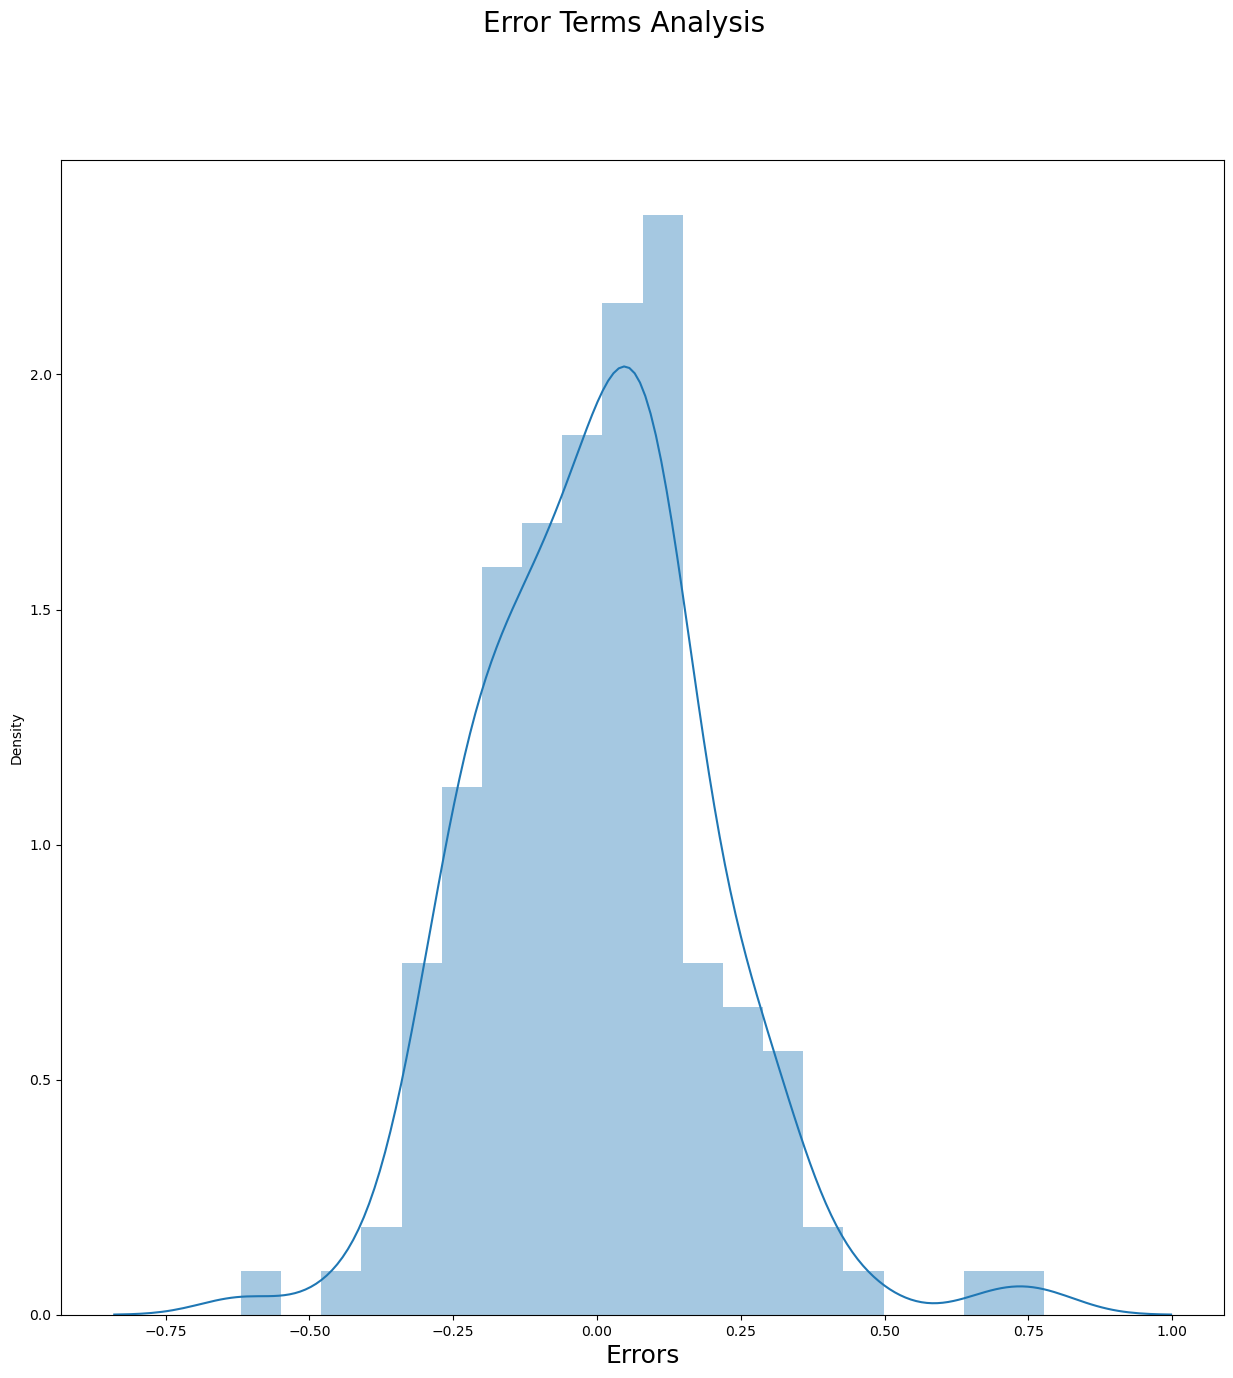

In [75]:
fig = plt.figure()
sns.distplot((y_train1 - y_train_ss_pred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [76]:
y_train_mm_pred=lm2.predict(X_train2)

Text(0.5, 0, 'Errors')

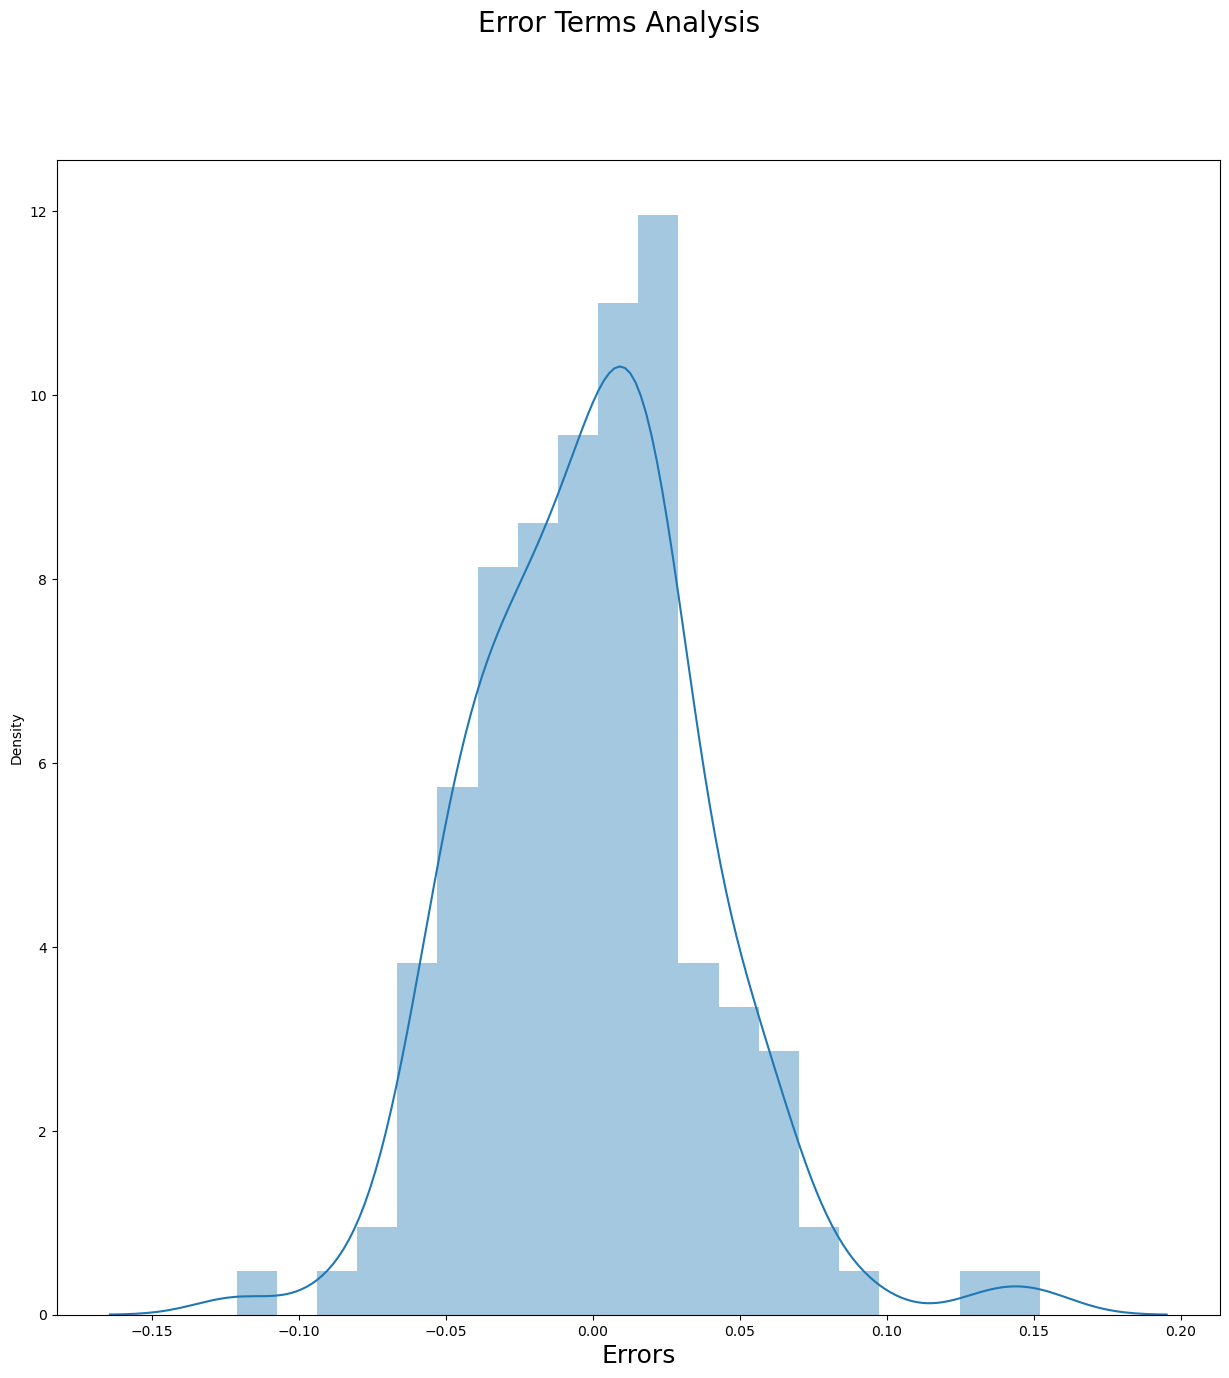

In [77]:
fig = plt.figure()
sns.distplot((y_train2 - y_train_mm_pred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [78]:
r2_score(y_train1, y_train_ss_pred)

0.9599116983473651

In [79]:
r2_score(y_train2,y_train_mm_pred)

0.9599116983473652

Testing

In [80]:
df_test_ss=df_test.copy()
df_test_mm=df_test.copy()

In [81]:
df_test_ss[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test_ss.shape

(52, 32)

In [82]:
df_test_mm[sig_num_col] = scaler_mms.transform(df_test[sig_num_col])
df_test_mm.shape

(52, 32)

In [83]:
y_test_ss = df_test_ss.pop('price')
X_test_ss = df_test_ss

y_test_mm = df_test_mm.pop('price')
X_test_mm = df_test_mm

In [84]:
y_pred_ss=lm1.predict(X_test_ss)
y_pred_mm=lm2.predict(X_test_mm)

Text(0, 0.5, 'y_pred')

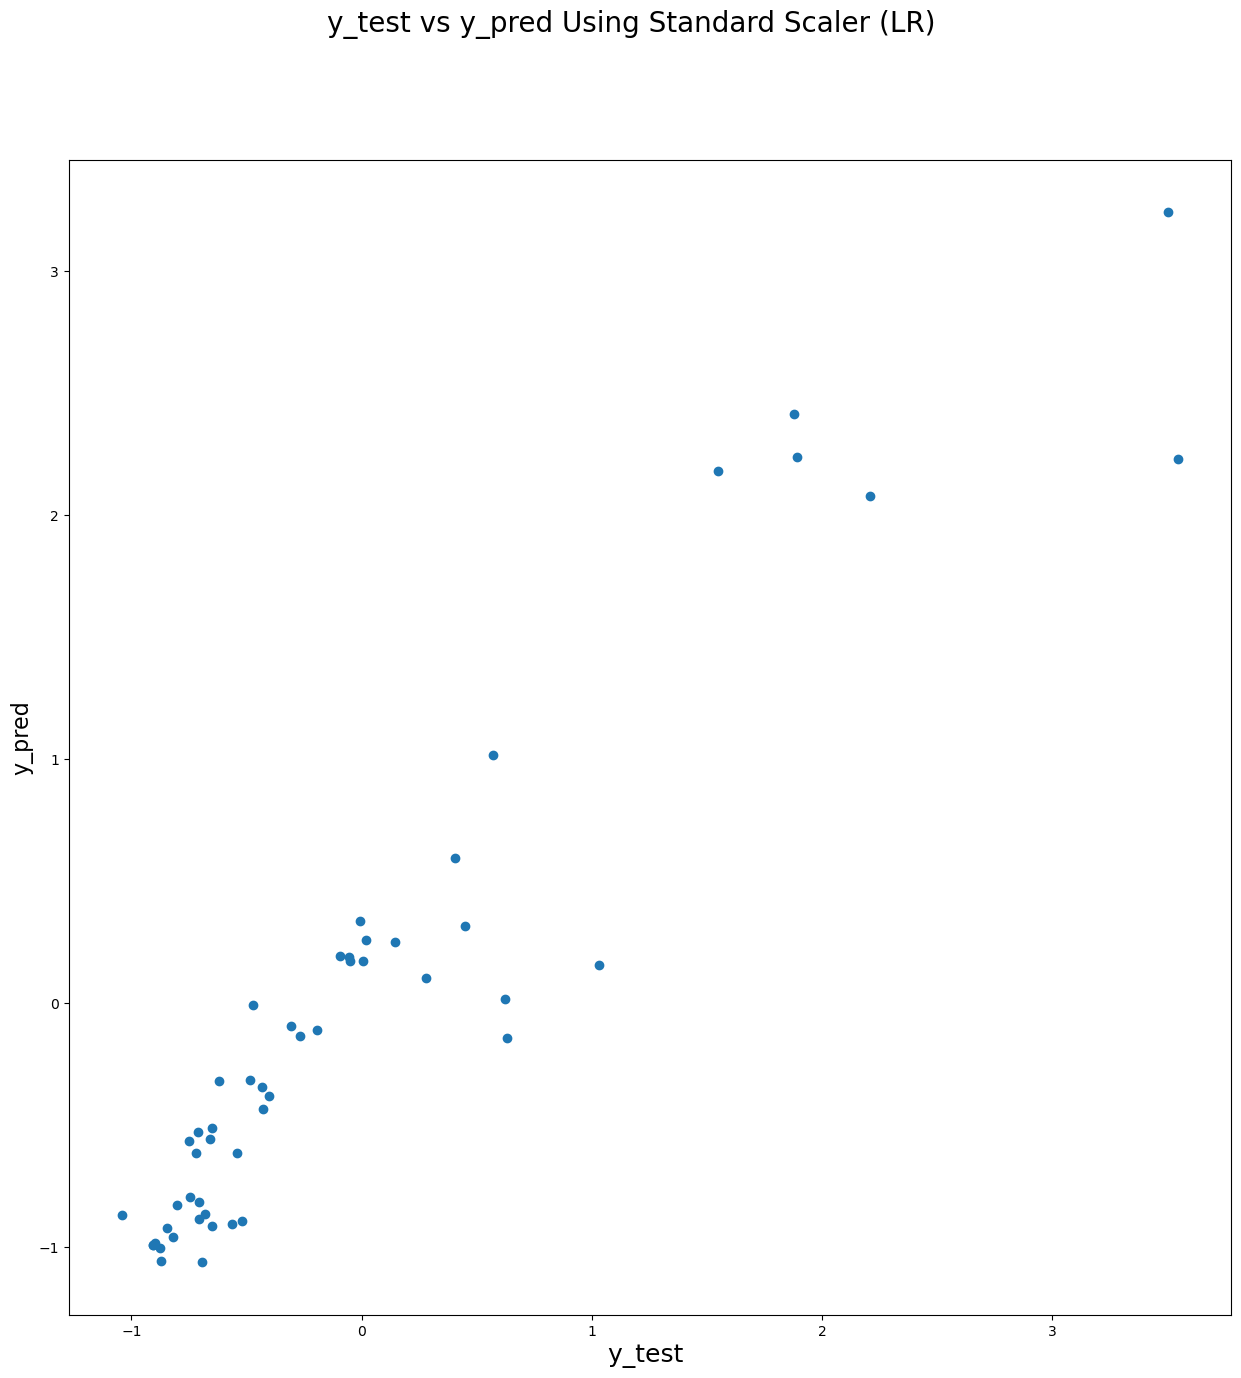

In [85]:
fig = plt.figure()
plt.scatter(y_test_ss,y_pred_ss)
fig.suptitle('y_test vs y_pred Using Standard Scaler (LR)', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

Text(0, 0.5, 'y_pred')

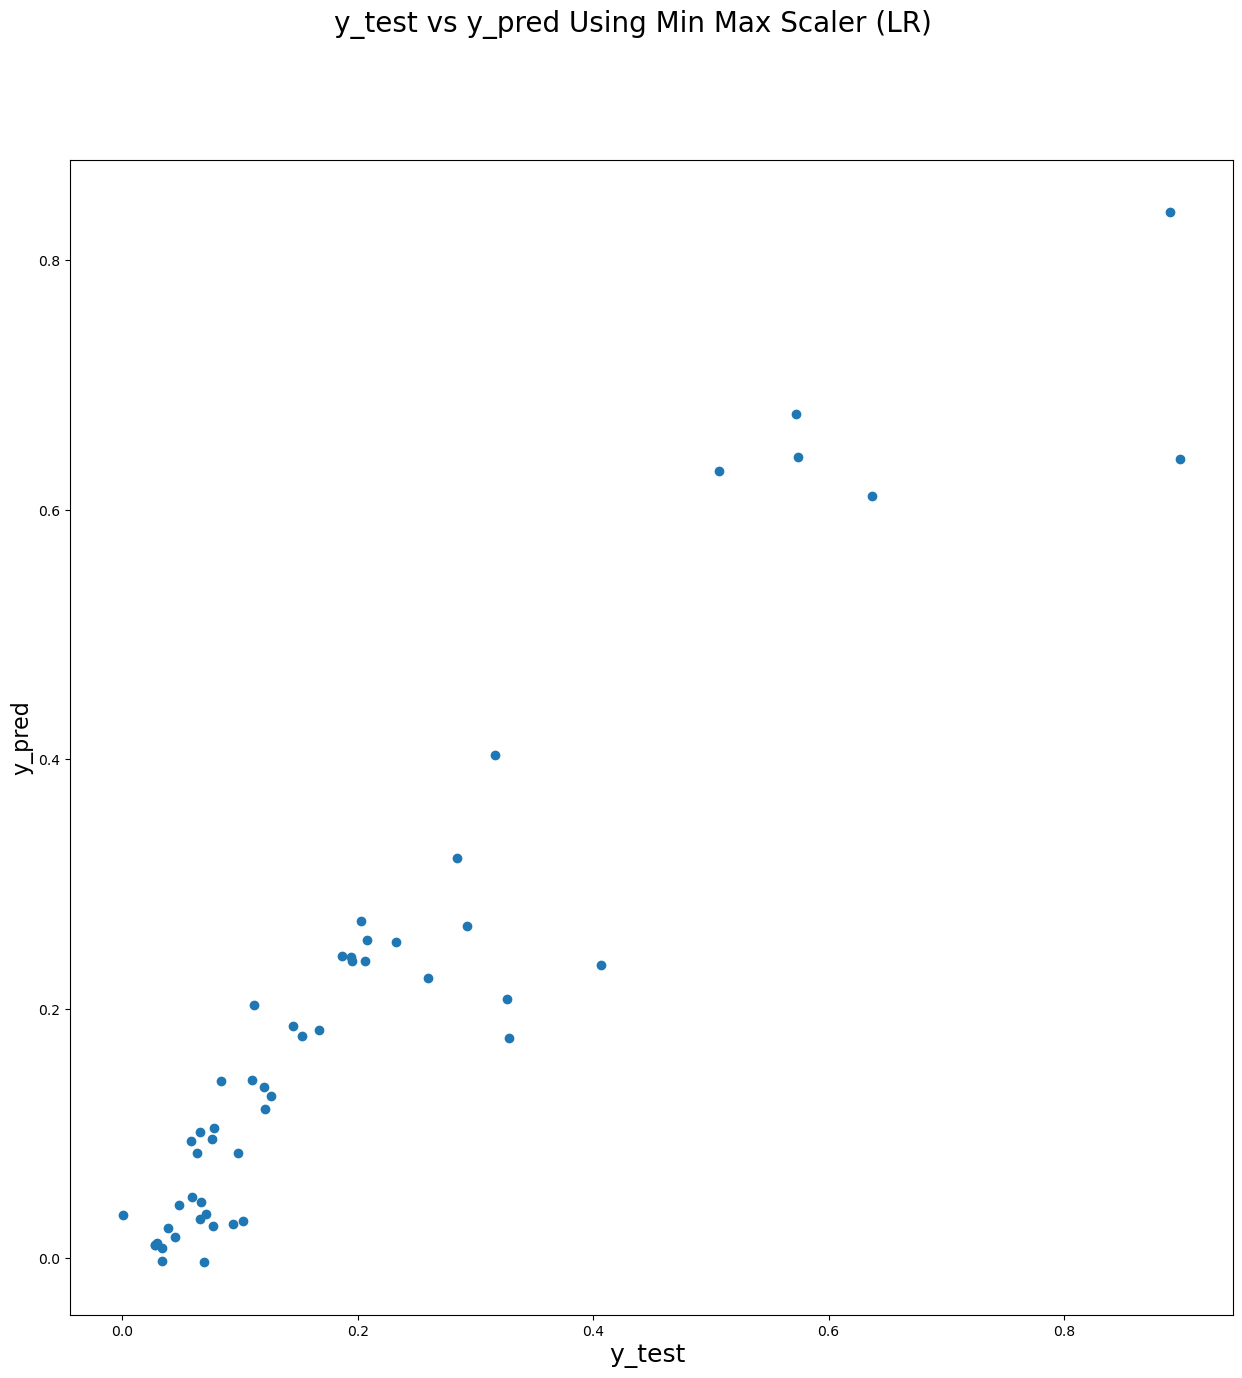

In [86]:
fig = plt.figure()
plt.scatter(y_test_mm,y_pred_mm)
fig.suptitle('y_test vs y_pred Using Min Max Scaler (LR)', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

Standart Scaler

In [87]:
r2_score(y_test_ss, y_pred_ss)

0.8895764327377597

In [88]:
metrics.mean_absolute_error(y_test_ss, y_pred_ss)

0.25316965837220345

In [89]:
metrics.mean_squared_error(y_test_ss, y_pred_ss)

0.12037178812525694

In [90]:
np.sqrt(metrics.mean_squared_error(y_test_ss, y_pred_ss))

0.34694637644059195

MinMax Scalar

In [127]:
lr_test_mm = r2_score(y_test_mm,y_pred_mm)
lr_test_mm

0.8895764327377598

In [92]:
metrics.mean_absolute_error(y_test_mm, y_pred_mm)

0.04951466259872977

In [93]:
metrics.mean_squared_error(y_test_mm, y_pred_mm)

0.00460435763163619

In [94]:
np.sqrt(metrics.mean_squared_error(y_test_mm, y_pred_mm))

0.06785541711341984

When Min Max is applied on dataset the error is less compared to Standard Scaler, so for further models minmax scalar train and test dataset is used

In [95]:
df_test_ss=df_test.copy()
df_test_mm=df_test.copy()

# Model Random Forest

In [152]:
RFR = RandomForestRegressor(n_estimators=50,random_state = 20,n_jobs = -1)

Training

In [165]:
RFR.fit(X_train2,y_train2)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=20)

In [166]:
RFR_train_pred = RFR.predict(X_train2)

In [167]:
r2_score(y_train2,RFR_train_pred)

0.9864914627674112

Testing

In [168]:
RFR_test_pred = RFR.predict(X_test_mm)

In [169]:
rfr_test = r2_score(y_test_mm,RFR_test_pred)
rfr_test

0.9412246961424993

# Model Gradient boost

In [96]:
GBR = GradientBoostingRegressor( max_depth=5,min_samples_leaf=2, 
                                min_samples_split=6, n_estimators=75, random_state=0)

Training

In [97]:
cross_val_GBR_r2 = cross_val_score(GBR, X_train2, y_train2 , cv = 5, scoring = 'r2' ) 

In [147]:
cross_val_GBR_r2.mean()

0.9106551180135629

In [98]:
cross_val_GBR_rmse = cross_val_score(GBR, X_train2, y_train2 , cv = 5, 
                                     scoring = 'neg_root_mean_squared_error' ) 

In [100]:
abs(cross_val_GBR_rmse.mean())

0.05583445965796804

Testing

In [101]:
cross_val_GBR_r2_test = cross_val_score(GBR, X_test_mm, y_test_mm , cv = 5, scoring = 'r2' ) 

In [146]:
gbr_test = cross_val_GBR_r2_test.mean()
gbr_test

0.7821929741841729

In [139]:
cross_val_GBR_rmse = cross_val_score(GBR, X_test_mm, y_test_mm , cv = 5, 
                                     scoring = 'neg_root_mean_squared_error' ) 

In [140]:
abs(cross_val_GBR_rmse.mean())

0.08018636812032809

# Model XG Boost

In [103]:
XGBR = XGBRegressor(n_estimators = 100, max_depth=3, learning_rate=0.05, random_state=0)

Training

In [104]:
cross_val_XGBR_r2 = cross_val_score(XGBR, X_train2, y_train2 , cv = 5, scoring = 'r2' ) 

In [145]:
cross_val_XGBR_r2.mean()

0.9208450293770765

In [105]:
cross_val_XGBR_rmse = cross_val_score(XGBR, X_train2, y_train2 , cv = 5, 
                                      scoring = 'neg_root_mean_squared_error' ) 

In [107]:
abs(cross_val_XGBR_rmse.mean())

0.05297436155090022

Testing

In [121]:
cross_val_XGBR_r2_test = cross_val_score(XGBR, X_test_mm, y_test_mm , cv = 5, scoring = 'r2' ) 

In [144]:
xgbr_test = cross_val_XGBR_r2_test.mean()
xgbr_test

0.6509126597584662

In [141]:
cross_val_XGBR_rmse = cross_val_score(XGBR, X_test_mm,  y_test_mm  , cv = 5, 
                                      scoring = 'neg_root_mean_squared_error' ) 

In [142]:
abs(cross_val_XGBR_rmse.mean())

0.10270398786226247

# Model Ada Boost

In [108]:
AdaB = AdaBoostRegressor(learning_rate=1.0, loss='exponential', n_estimators=100, random_state=0)

Training

In [109]:
cross_val_AdaB_r2 = cross_val_score(AdaB, X_train2, y_train2 , cv = 5, scoring = 'r2' )

In [143]:
cross_val_AdaB_r2.mean()

0.899741158940817

In [110]:
cross_val_AdaB_rmse = cross_val_score(AdaB, X_train2, y_train2 , cv = 5, 
                                      scoring = 'neg_root_mean_squared_error' ) 

In [112]:
abs(cross_val_AdaB_rmse.mean())

0.056975860138923404

Testing

In [113]:
cross_val_AdaB_rmse = cross_val_score(AdaB, X_test_mm, y_test_mm , cv = 5, 
                                      scoring = 'neg_root_mean_squared_error' ) 

In [114]:
abs(cross_val_AdaB_rmse.mean())

0.06126186628926293

In [115]:
cross_val_AdaB_r2 = cross_val_score(AdaB, X_test_mm, y_test_mm , cv = 5, scoring = 'r2' )

In [131]:
adab_test = cross_val_AdaB_r2.mean()
adab_test

0.899741158940817

# Comparision between models

In [170]:
models = ['Linear Regression','Random Forest', 'Gradient Boosting', 'XgBoost','Ada Boost']

In [171]:
scores = [lr_test_mm,rfr_test,gbr_test,xgbr_test,adab_test]

In [172]:
models = pd.DataFrame({'Model' : models, 'Score' : scores})

In [173]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest,0.941225
4,Ada Boost,0.899741
0,Linear Regression,0.889576
2,Gradient Boosting,0.782193
3,XgBoost,0.650913


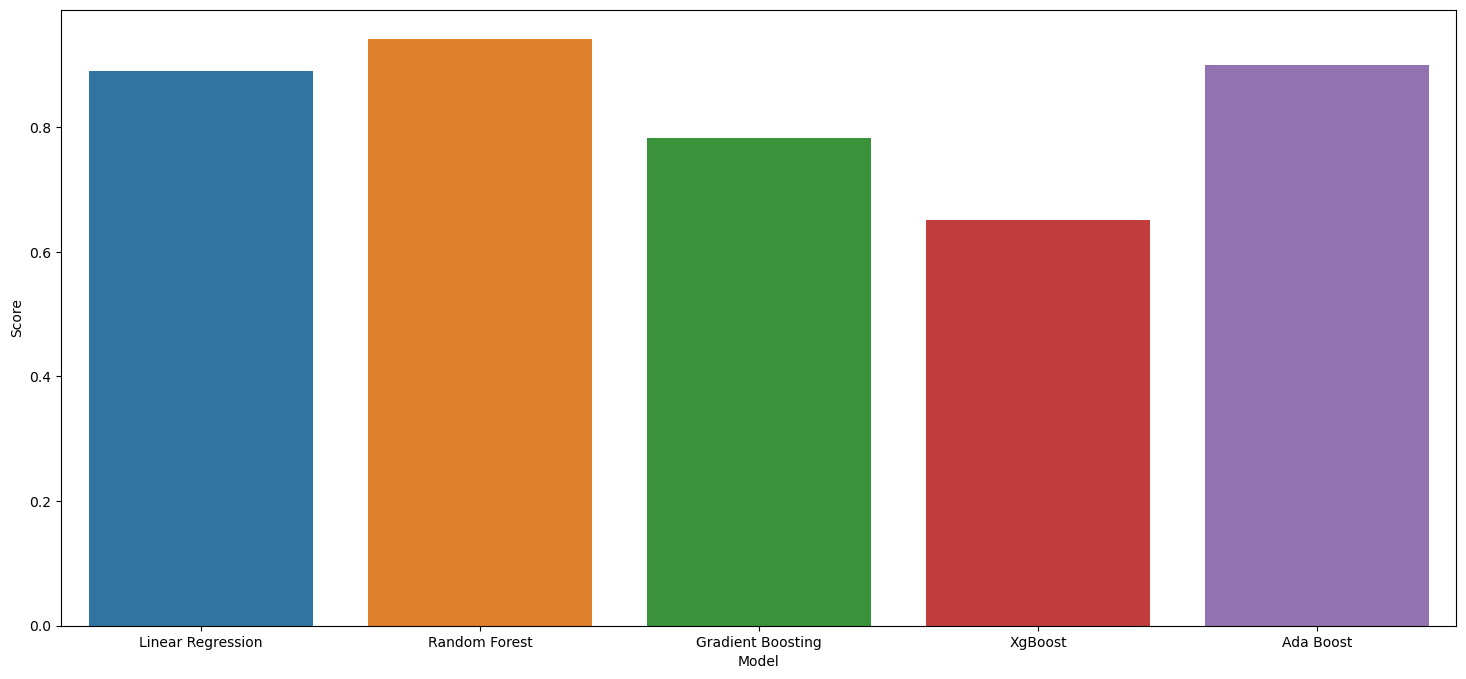

In [174]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

Random Forest provides the best prediction